In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import glob
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('AveragesByDay/daily_average.csv')

In [40]:
print(df.columns)

Index(['day', 'location', 'index', 'Unnamed: 0', 'hourly.temperature_2m',
       'hourly.relative_humidity_2m', 'hourly.dew_point_2m',
       'hourly.apparent_temperature', 'hourly.precipitation', 'hourly.rain',
       'hourly.snowfall', 'hourly.snow_depth', 'hourly.weather_code',
       'hourly.pressure_msl', 'hourly.surface_pressure', 'hourly.cloud_cover',
       'hourly.cloud_cover_low', 'hourly.cloud_cover_mid',
       'hourly.cloud_cover_high', 'hourly.et0_fao_evapotranspiration',
       'hourly.vapour_pressure_deficit', 'hourly.wind_speed_10m',
       'hourly.wind_speed_100m', 'hourly.wind_direction_10m',
       'hourly.wind_direction_100m', 'hourly.wind_gusts_10m',
       'hourly.soil_temperature_0_to_7cm', 'hourly.soil_temperature_7_to_28cm',
       'hourly.soil_temperature_28_to_100cm',
       'hourly.soil_temperature_100_to_255cm', 'hourly.soil_moisture_0_to_7cm',
       'hourly.soil_moisture_7_to_28cm', 'hourly.soil_moisture_28_to_100cm',
       'hourly.soil_moisture_100_to_

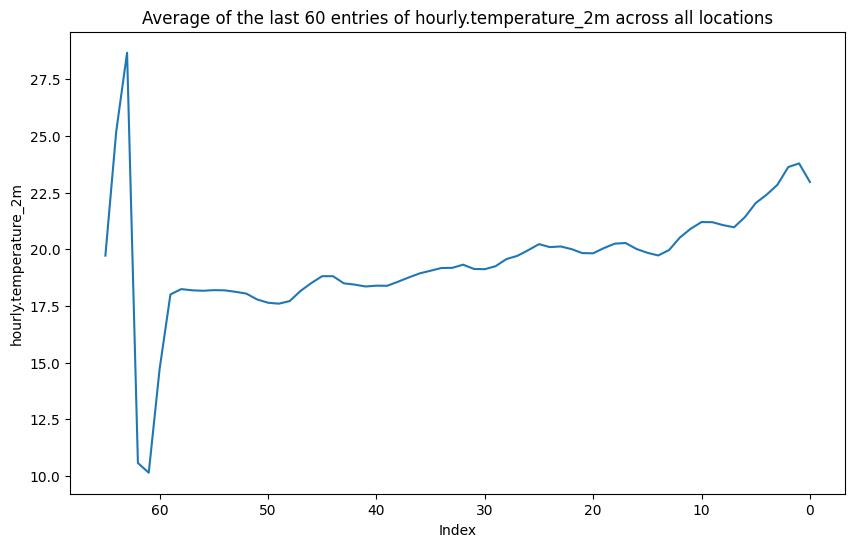

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Group by location, reset index within each group, and get the last 60 entries
grouped = df.groupby('location')['hourly.temperature_2m'].apply(lambda x: x.reset_index(drop=True).tail(60))

# Calculate the mean of 'hourly.temperature_2m' for each relative position
average = grouped.groupby(level=1).mean()

# Create a reversed index for plotting
new_index = np.arange(len(average)-1, -1, -1)

# Plot the result
plt.figure(figsize=(10, 6))
plt.plot(new_index, average.values)
plt.gca().invert_xaxis()  # Reverse the x-axis
plt.title('Average of the last 60 entries of hourly.temperature_2m across all locations')
plt.xlabel('Index')
plt.ylabel('hourly.temperature_2m')
plt.show()

In [21]:
print(average.values)

[19.71666667 25.19583333 28.66666667 10.5691092  10.14173851 14.70942982
 18.00698917 18.24066384 18.18734699 18.16747411 18.19424906 18.18620998
 18.12084981 18.04208569 17.78393362 17.63967985 17.59802731 17.71197269
 18.15862994 18.50863936 18.81048023 18.80982345 18.49519774 18.43941149
 18.35637476 18.39193974 18.38748352 18.56598164 18.75734934 18.93413136
 19.05098635 19.1713371  19.17742467 19.31823211 19.12936441 19.11876412
 19.25191149 19.56483522 19.70615584 19.95452919 20.22348399 20.09279896
 20.12120056 20.00466573 19.82856403 19.82085217 20.05168079 20.24625
 20.27213277 20.00952684 19.84315913 19.72394539 19.96145951 20.51497646
 20.90342985 21.19849105 21.19198446 21.06080508 20.96818974 21.41594397
 22.03817128 22.40306199 22.84143348 23.62477471 23.78430572 22.96409026]


In [49]:
vars = ['hourly.temperature_2m',
       'hourly.relative_humidity_2m', 'hourly.dew_point_2m',
       'hourly.apparent_temperature', 'hourly.precipitation', 'hourly.rain',
       'hourly.snowfall', 'hourly.snow_depth', 'hourly.weather_code',

       'hourly.pressure_msl', 'hourly.surface_pressure', 'hourly.cloud_cover',
       'hourly.cloud_cover_low', 'hourly.cloud_cover_mid',
       'hourly.cloud_cover_high', 'hourly.et0_fao_evapotranspiration',

       'hourly.vapour_pressure_deficit', 'hourly.wind_speed_10m',
       'hourly.wind_speed_100m', 'hourly.wind_direction_10m',
       'hourly.wind_direction_100m', 'hourly.wind_gusts_10m',

       'hourly.soil_temperature_0_to_7cm', 'hourly.soil_temperature_7_to_28cm',
       'hourly.soil_temperature_28_to_100cm',
       'hourly.soil_temperature_100_to_255cm', 'hourly.soil_moisture_0_to_7cm',

       'hourly.soil_moisture_7_to_28cm', 'hourly.soil_moisture_28_to_100cm',
       'hourly.soil_moisture_100_to_255cm', 'hourly.is_day',
       'hourly.sunshine_duration', 'hourly.shortwave_radiation',

       'hourly.direct_radiation', 'hourly.diffuse_radiation',
       'hourly.direct_normal_irradiance', 'hourly.global_tilted_irradiance',
       'hourly.terrestrial_radiation', 'hourly.shortwave_radiation_instant',

       'hourly.direct_radiation_instant', 'hourly.diffuse_radiation_instant',
       'hourly.direct_normal_irradiance_instant',

       'hourly.global_tilted_irradiance_instant',
       'hourly.terrestrial_radiation_instant', 'fwix', 'ffmc', 'dmc', 'dc',
       'isi', 'bui']

units = ['°C', 
         '%', '°C', 
         '°C', 'mm', 'mm', 
         'cm', 'm', 'WMO code', 

         'hPa', 'hPa', '%', 
         '%', '%',
         '%', 'mm', 

         'kPa', 'km/h', 
         'km/h', '°', 
         '°', 'km/h',

         '°C', '°C', 
         '°C',
         '°C', 'm³/m³', 

         'm³/m³', 'm³/m³',
         'm³/m³', '',
         'seconds', 'W/m²',

         'W/m²','W/m²',
         'W/m²', 'W/m²',
         'W/m²', 'W/m²'

         'W/m²','W/m²',
         'W/m²',

         'W/m²','W/m²',
         'W/m²','','','','',
         '',''
]

for j in range(len(vars)):
    print(vars[j], units[j])

hourly.temperature_2m °C
hourly.relative_humidity_2m %
hourly.dew_point_2m °C
hourly.apparent_temperature °C
hourly.precipitation mm
hourly.rain mm
hourly.snowfall cm
hourly.snow_depth m
hourly.weather_code WMO code
hourly.pressure_msl hPa
hourly.surface_pressure hPa
hourly.cloud_cover %
hourly.cloud_cover_low %
hourly.cloud_cover_mid %
hourly.cloud_cover_high %
hourly.et0_fao_evapotranspiration mm
hourly.vapour_pressure_deficit kPa
hourly.wind_speed_10m km/h
hourly.wind_speed_100m km/h
hourly.wind_direction_10m °
hourly.wind_direction_100m °
hourly.wind_gusts_10m km/h
hourly.soil_temperature_0_to_7cm °C
hourly.soil_temperature_7_to_28cm °C
hourly.soil_temperature_28_to_100cm °C
hourly.soil_temperature_100_to_255cm °C
hourly.soil_moisture_0_to_7cm m³/m³
hourly.soil_moisture_7_to_28cm m³/m³
hourly.soil_moisture_28_to_100cm m³/m³
hourly.soil_moisture_100_to_255cm m³/m³
hourly.is_day 
hourly.sunshine_duration seconds
hourly.shortwave_radiation W/m²
hourly.direct_radiation W/m²
hourly.diff

[22.902424670433167, 23.529719868173277, 23.321706685499066, 22.775360169491496, 22.244239642184564, 21.81134651600757, 21.19382297551786, 20.85145244821092, 21.011878531073496, 21.041727871939795, 21.091299435028255, 20.815426082862533, 20.345859227871934, 19.877139830508508, 19.76353107344635, 19.853933615819233, 20.038227401129973, 20.142582391713752, 20.094613935969846, 19.926661958568708, 19.768095574387935, 19.77646657250474, 19.933928907721278, 20.039435028248594, 20.045513182674203, 20.15472928436913, 19.958057909604534, 19.79126177024482, 19.71499293785311, 19.31783662900186]


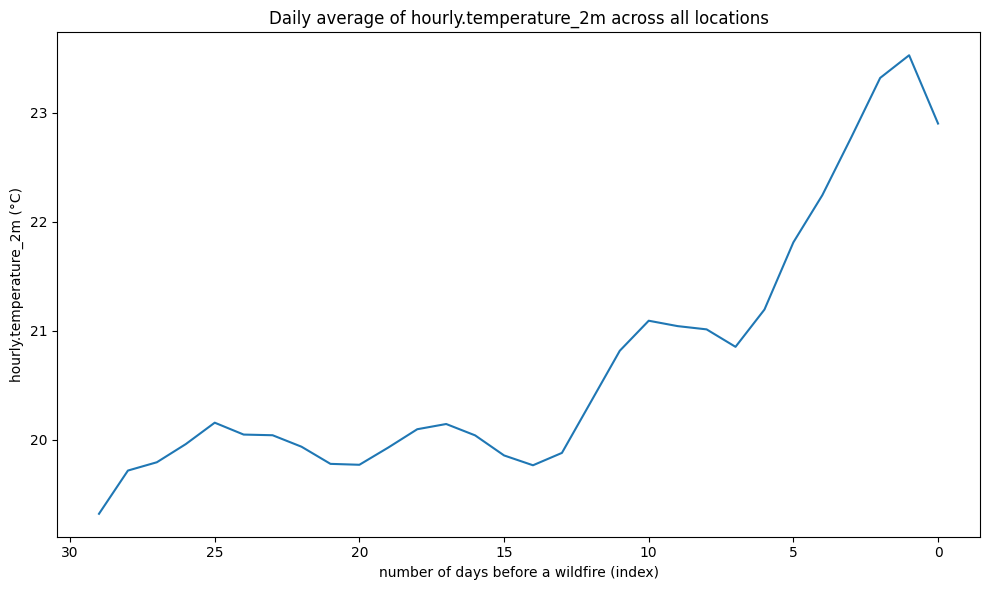

[57.7536487758945, 53.246939736346434, 52.37000941619581, 53.325564971751405, 54.32229284369118, 55.93750000000001, 57.672010357815445, 59.238206214689306, 58.60936911487755, 58.603460451977384, 58.48003766478353, 58.90574387947269, 59.5505649717513, 60.64060734463281, 60.99491525423724, 60.23820621468922, 59.92768361581927, 60.57518832391701, 60.44098399246704, 60.957132768361575, 61.161958568738235, 62.26386534839927, 62.87429378531073, 62.39896421845576, 61.51026365348403, 60.26021657250468, 60.70543785310732, 61.639030131826715, 62.25440207156324, 63.307815442561285]


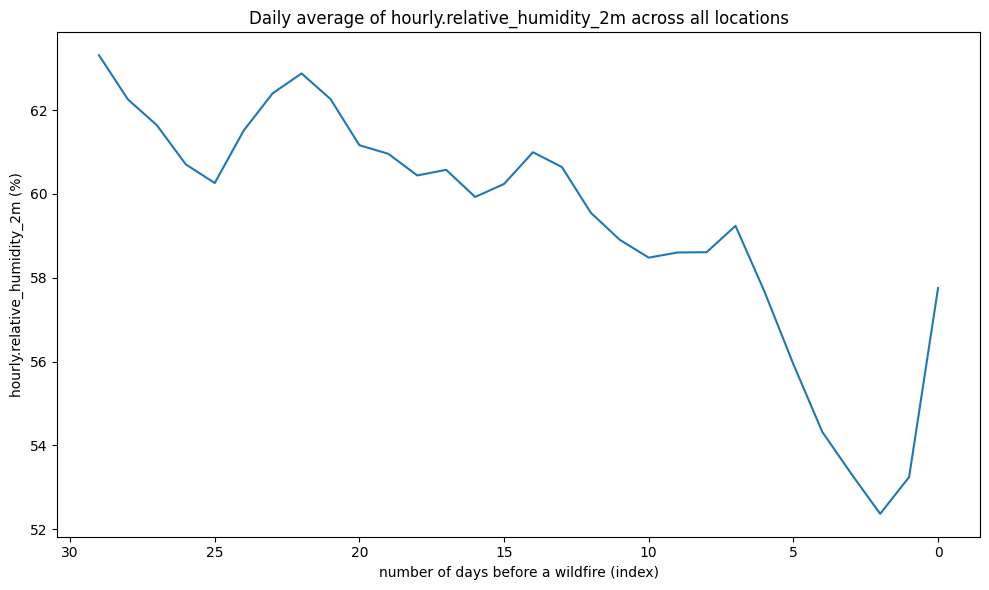

[12.87204566854991, 11.965426082862525, 11.441028719397343, 11.196899717514121, 10.978509887005655, 11.09426318267417, 11.045077683615812, 11.189884651600769, 11.139877589453857, 11.183535781544236, 11.162149246704333, 11.075675612052732, 10.825840395480217, 10.646287664783422, 10.66651600753296, 10.500878060263657, 10.521577212806035, 10.787485875706246, 10.67700800376648, 10.732827212806026, 10.656195856873811, 11.040974576271186, 11.363620527306962, 11.35183851224108, 11.075649717514137, 10.821624293785314, 10.715211864406761, 10.871235875706205, 10.93217278719397, 10.890717984934081]


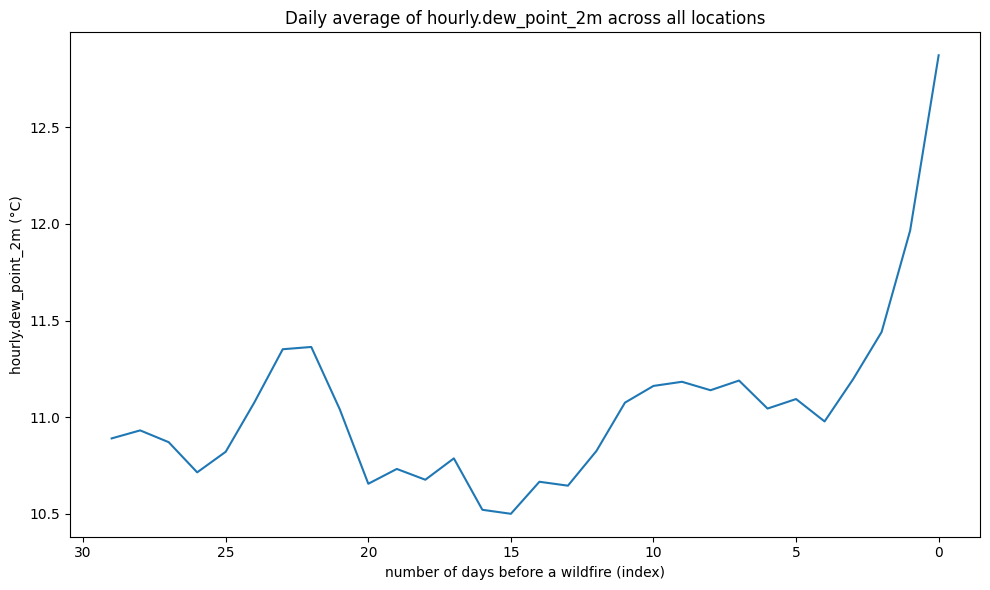

[23.02189265536721, 23.42550141242938, 23.044409133709976, 22.37816619585686, 21.749837570621487, 21.296760828625224, 20.648128531073475, 20.285496704331468, 20.436082862523556, 20.49291195856874, 20.538999529190214, 20.25206920903953, 19.728945386064016, 19.150414312617713, 19.00826741996233, 19.056141713747653, 19.20552024482111, 19.42704331450093, 19.355983992467092, 19.177102165725074, 19.01070150659131, 19.15875706214687, 19.38609934086632, 19.515670903954785, 19.41742231638421, 19.45735640301322, 19.27219397363467, 19.104748116760817, 19.06146421845577, 18.623785310734476]


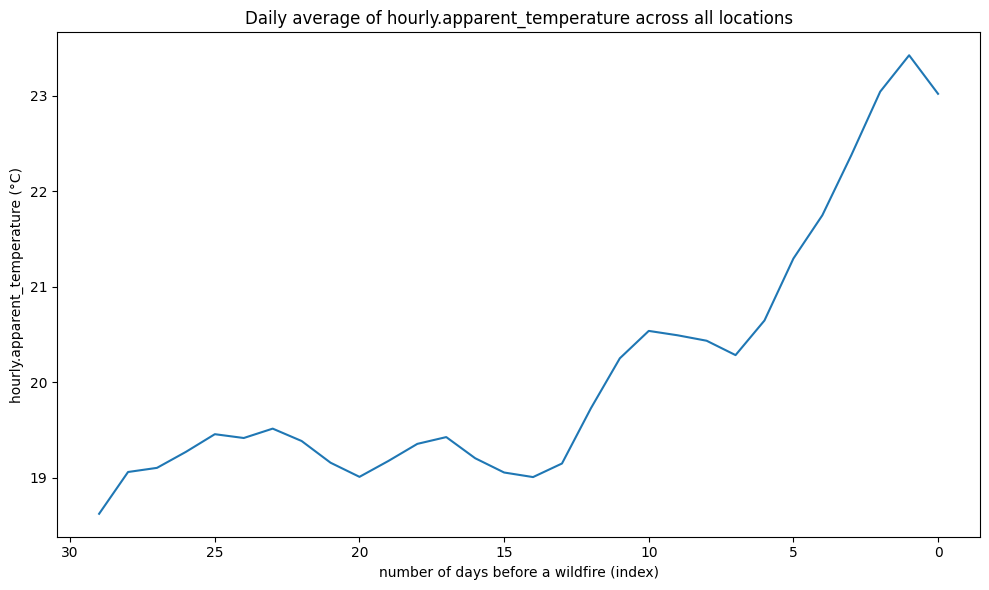

[0.08550376647834274, 0.032951977401129984, 0.01750941619585683, 0.013820621468926509, 0.013580508474576257, 0.01550847457627116, 0.019489171374764563, 0.03126647834274953, 0.023083804143126142, 0.020510828625235372, 0.028234463276836156, 0.0261134651600753, 0.026680790960451964, 0.028102636534839943, 0.03307674199623357, 0.022231638418079066, 0.03732580037664783, 0.04575800376647831, 0.041304143126177084, 0.032869585687382394, 0.02653954802259886, 0.029169020715630916, 0.04376412429378533, 0.04096516007532961, 0.03691148775894542, 0.03703154425612053, 0.03676318267419963, 0.03399717514124307, 0.03981403013182678, 0.042325800376647835]


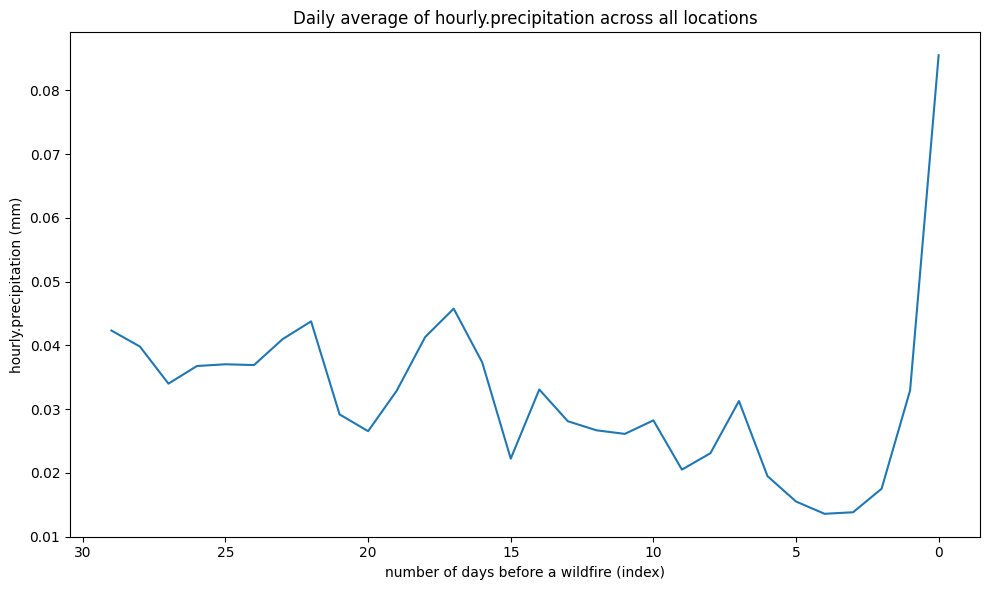

[0.08550376647834274, 0.032951977401129984, 0.01750941619585683, 0.013820621468926509, 0.013580508474576257, 0.01550847457627116, 0.019489171374764563, 0.03126647834274953, 0.023083804143126142, 0.020510828625235372, 0.028234463276836156, 0.0261134651600753, 0.026680790960451964, 0.028102636534839943, 0.03307674199623357, 0.022231638418079066, 0.03732580037664783, 0.04575800376647831, 0.0412947269303202, 0.0328578154425613, 0.026527777777777768, 0.029169020715630916, 0.04369114877589456, 0.04096516007532961, 0.036887947269303244, 0.03699387947269304, 0.03673728813559323, 0.033865348399246833, 0.03951271186440682, 0.042325800376647835]


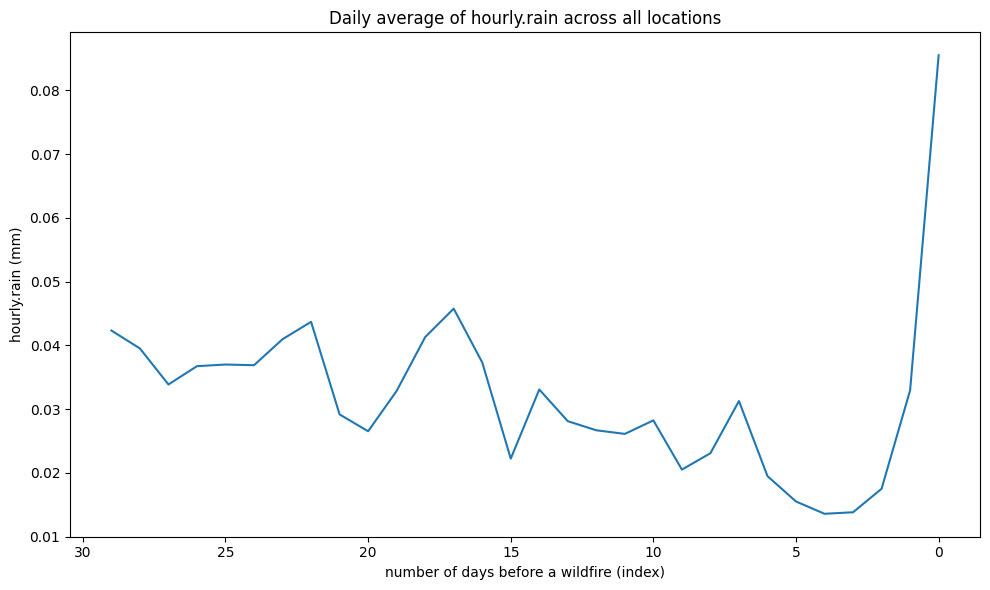

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.591337099811638e-06, 8.239171374764577e-06, 8.239171374764577e-06, 0.0, 5.108286252354039e-05, 0.0, 1.6478342749529097e-05, 2.636534839924661e-05, 1.8126177024482034e-05, 9.227871939736334e-05, 0.0002109227871939735, 0.0]


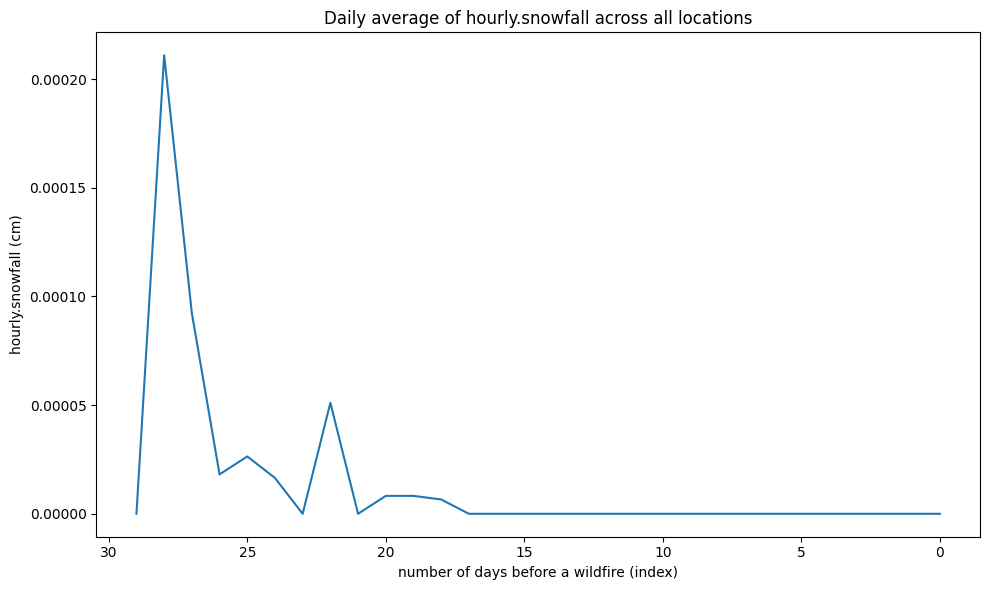

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


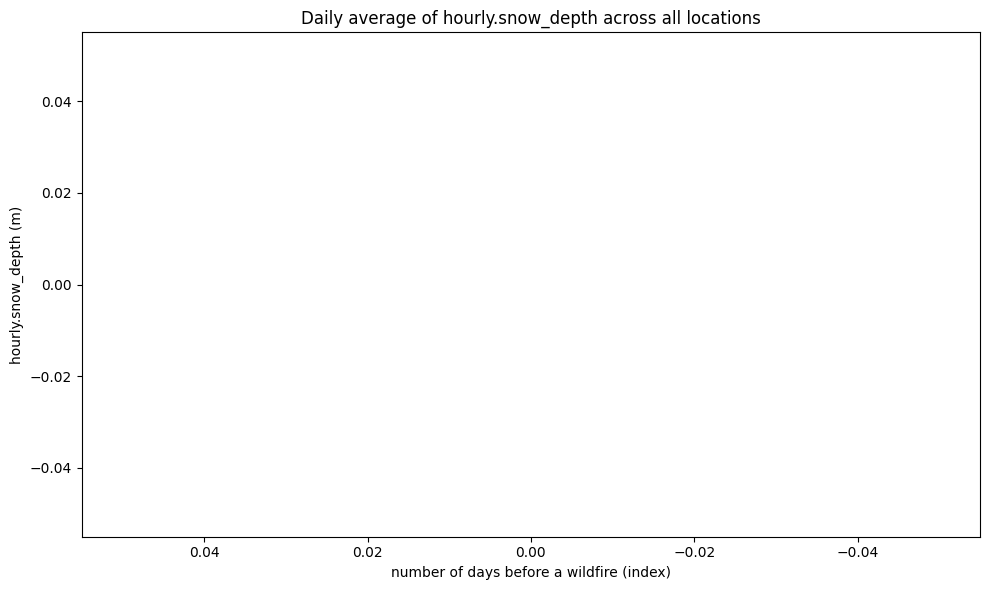

[7.232838983050837, 3.2183615819208997, 1.960193032015065, 1.620433145009417, 1.495927495291903, 1.7831920903954823, 2.2749529190207127, 3.334675141242939, 2.621633709981164, 2.5258709981167593, 2.8818267419962327, 2.8725753295668555, 3.015254237288135, 3.1709510357815462, 3.441572504708097, 3.2492467043314472, 4.0890065913371, 4.9231873822975505, 4.536275894538608, 4.021586629001889, 3.5862288135593245, 3.7396421845574435, 4.746845574387948, 4.279472693032011, 4.2812853107344635, 3.8215160075329493, 3.7849576271186494, 3.9520244821092283, 4.312217514124294, 4.928601694915244]


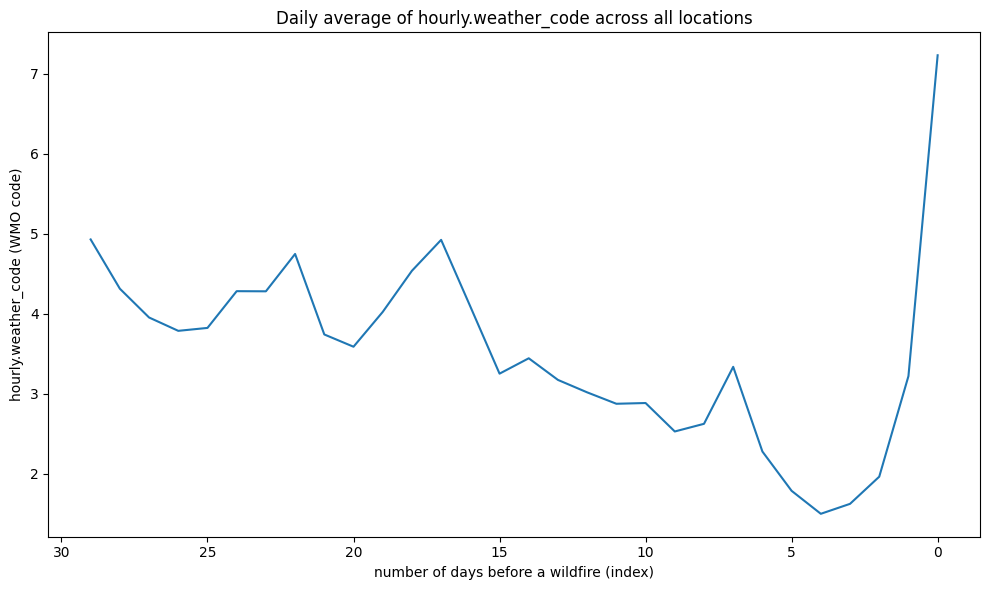

[1015.1062193973635, 1015.7317208097945, 1016.4744209039549, 1016.9328319209043, 1017.249738700565, 1017.4055743879485, 1017.2097669491504, 1017.0133380414329, 1017.0340819209039, 1017.159322033897, 1017.0962594161949, 1017.0536793785313, 1017.0489971751402, 1017.2164030131852, 1017.3451177024473, 1017.2565419020727, 1016.9579519774011, 1016.9377212806016, 1017.06897363465, 1017.226706685498, 1017.3169609227875, 1017.0298422787174, 1016.6390136534844, 1016.6014336158189, 1016.475256591336, 1016.4527777777778, 1016.7607321092288, 1016.8437758945388, 1016.8780649717534, 1016.7935475517886]


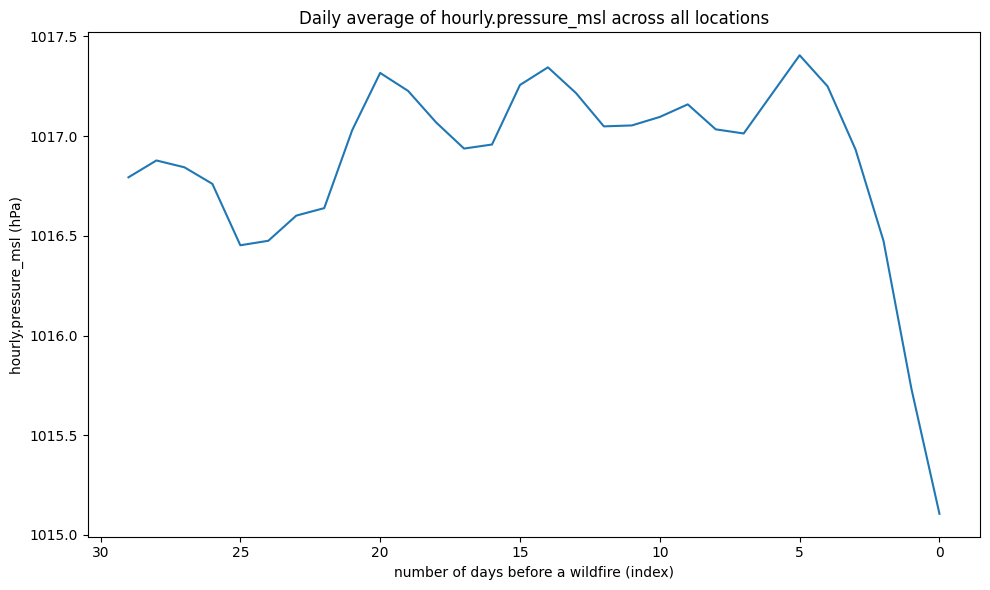

[956.8834369114874, 957.6049670433133, 958.2709769303199, 958.5852895480225, 958.7748681732594, 958.8460169491512, 958.5385593220336, 958.2986134651591, 958.3594915254255, 958.4718973634668, 958.4237594161964, 958.3460404896427, 958.2518196798504, 958.2993832391714, 958.3844609227872, 958.3128578154424, 958.0697175141236, 958.0844726930317, 958.2095786252349, 958.326038135594, 958.3612641242935, 958.0746986817327, 957.7358709981141, 957.7213959510347, 957.6162994350278, 957.6270291902085, 957.8731803201505, 957.9182933145005, 957.9413841807909, 957.7930343691166]


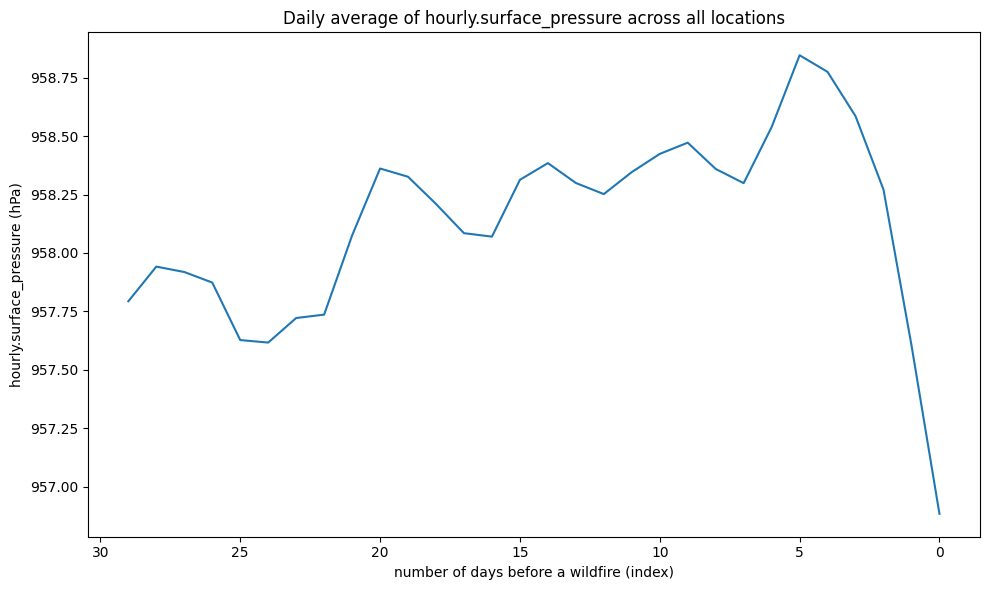

[25.568079096045185, 18.08564030131827, 13.618549905838051, 13.287900188323903, 14.035805084745771, 14.616195856873826, 17.596916195856895, 21.43361581920902, 19.086581920903956, 19.16751412429381, 18.701530131826722, 18.323046139359704, 18.70562617702449, 20.12434086629003, 22.839500941619583, 23.07900188323919, 24.73983050847459, 23.672810734463322, 24.674576271186435, 23.978013182674136, 24.23837099811674, 23.236746704331463, 25.486275894538558, 24.268973634651562, 24.025164783427577, 23.884180790960457, 24.427518832391712, 26.100376647834256, 24.74013653483995, 26.279378531073426]


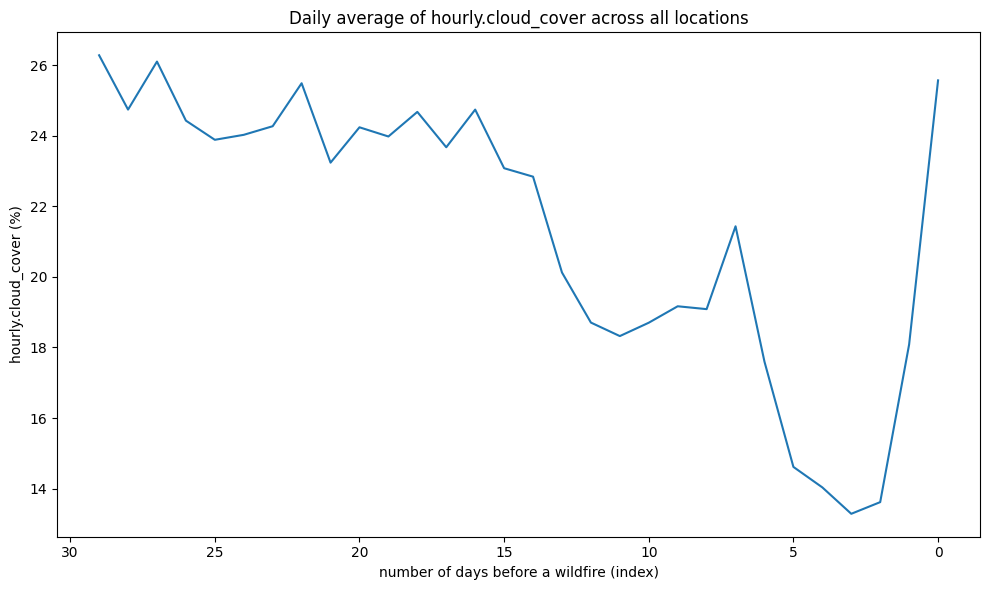

[5.819985875706217, 4.091148775894539, 4.277236346516004, 5.521845574387954, 6.8502118644067815, 8.113700564971753, 9.990513182674203, 13.86847928436914, 11.581873822975517, 11.44001883239171, 11.446704331450094, 11.147999058380403, 11.705249529190201, 13.416007532956682, 15.30866290018834, 14.893032015065918, 17.22725988700564, 16.6311440677966, 16.059722222222227, 15.72349340866293, 16.73394538606406, 16.22695386064033, 17.8335216572505, 15.63778248587569, 15.28161487758946, 13.33222693032017, 14.122551789077207, 16.65967514124294, 16.125564971751444, 17.254213747645945]


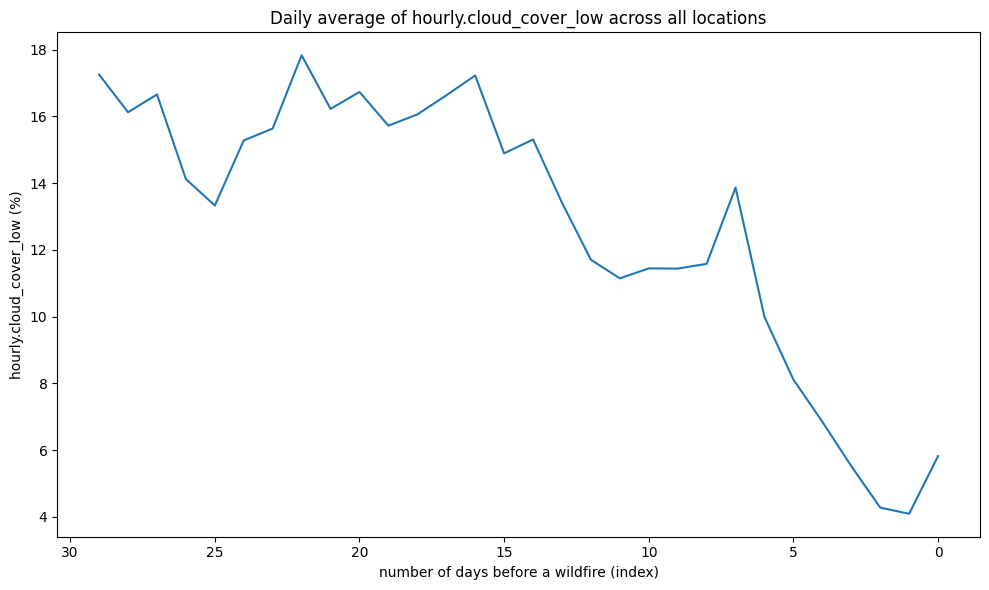

[16.249482109227852, 10.623446327683626, 7.753813559322033, 5.654849340866294, 4.725870998116755, 5.243126177024486, 6.447622410546133, 6.969515065913362, 6.252707156308857, 6.427330508474563, 6.583874764595106, 6.869844632768358, 7.4761770244821015, 7.362264595103581, 8.925094161958564, 8.973540489642176, 9.23910075329566, 8.76146421845574, 10.27944915254237, 9.333662900188319, 8.50489642184557, 7.906520715630889, 9.571751412429382, 9.718479284369105, 9.336064030131828, 9.241242937853112, 9.547740112994354, 9.166760828625222, 8.795998116760819, 10.345998116760839]


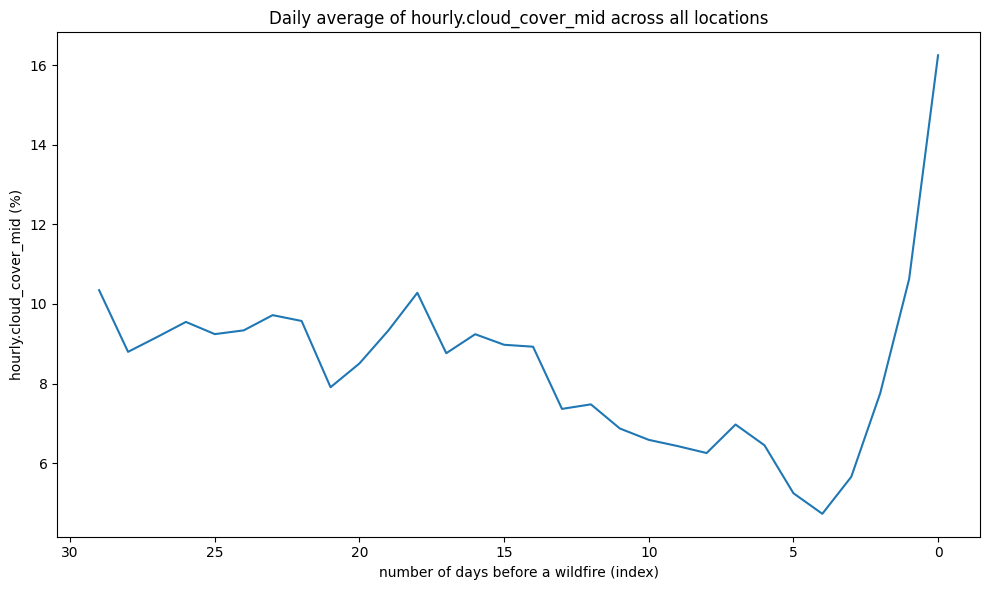

[36.681826741996204, 27.356732580037665, 17.77288135593218, 17.36591337099813, 17.738959510357827, 15.495409604519766, 17.813983050847455, 20.065560263653495, 18.335546139359703, 18.968267419962352, 17.718149717514112, 16.376483050847458, 15.166290018832395, 16.268785310734483, 17.4542372881356, 18.423163841807902, 18.92370527306967, 16.75153013182673, 19.9473870056497, 18.92834274952919, 18.313276836158188, 17.27278719397365, 17.80407250470809, 20.251435969868147, 20.119397363465158, 24.986393596986833, 24.337970809792846, 23.862146892655396, 21.102024482109233, 20.487052730696767]


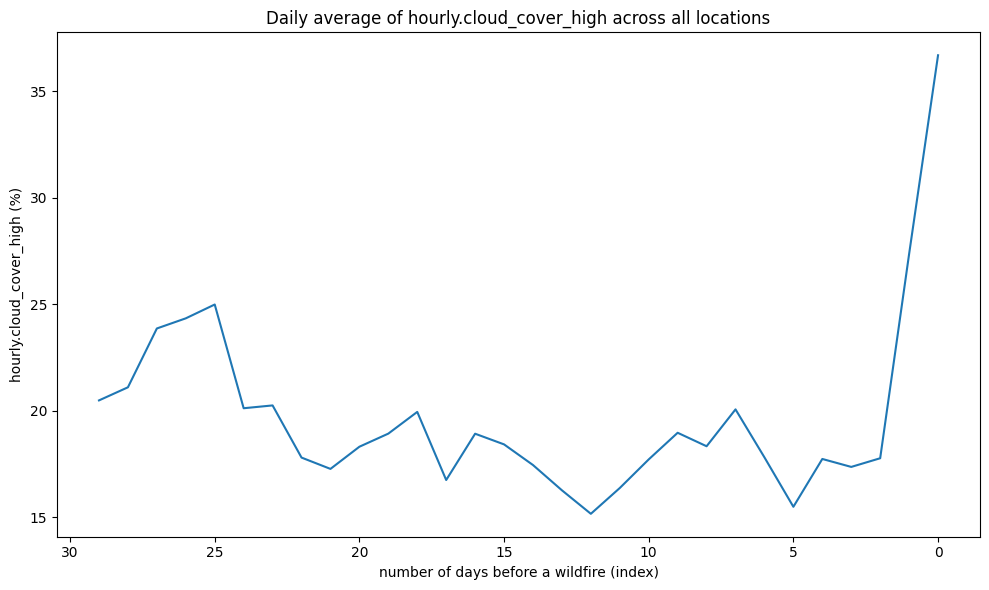

[0.20452989642184527, 0.2235652071563089, 0.23338182674199642, 0.23466219397363458, 0.23354260828625237, 0.23062641242937867, 0.2235628531073451, 0.2171711700646855, 0.2239138418079096, 0.22121351224105426, 0.22155484934086633, 0.21899788135593226, 0.21631591337099842, 0.21414053672316408, 0.21073022598870048, 0.215134180790961, 0.21551153483992472, 0.21534887005649692, 0.21324317325800404, 0.21256591337099784, 0.21302777777777748, 0.2122401129943503, 0.20878107344632774, 0.21065842749529168, 0.21267019774011306, 0.2151391242937856, 0.21472363465160052, 0.21297104519774035, 0.21213229755178878, 0.20774764595103573]


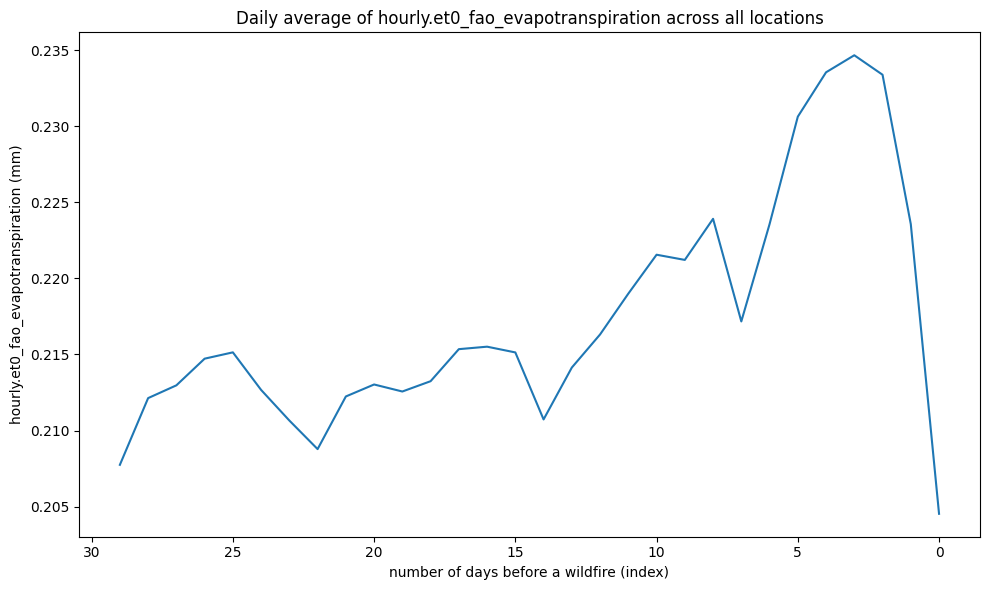

[1.431531544256119, 1.6471977401129936, 1.6560863935969836, 1.5836478342749556, 1.5075692090395467, 1.421633709981169, 1.3180298964218469, 1.2414545668549892, 1.2844849340866276, 1.292435499058382, 1.3121158192090399, 1.2756551318267424, 1.214876883239175, 1.1486565442561196, 1.1281869114877616, 1.1651224105461395, 1.2009856403013184, 1.188345809792843, 1.1985004708097913, 1.1704489171374775, 1.1542398775894538, 1.122344161958571, 1.1230786252354061, 1.140166195856874, 1.1687043314500927, 1.2090141242937844, 1.1805421374764584, 1.1390800376647845, 1.122624764595102, 1.0678766478342736]


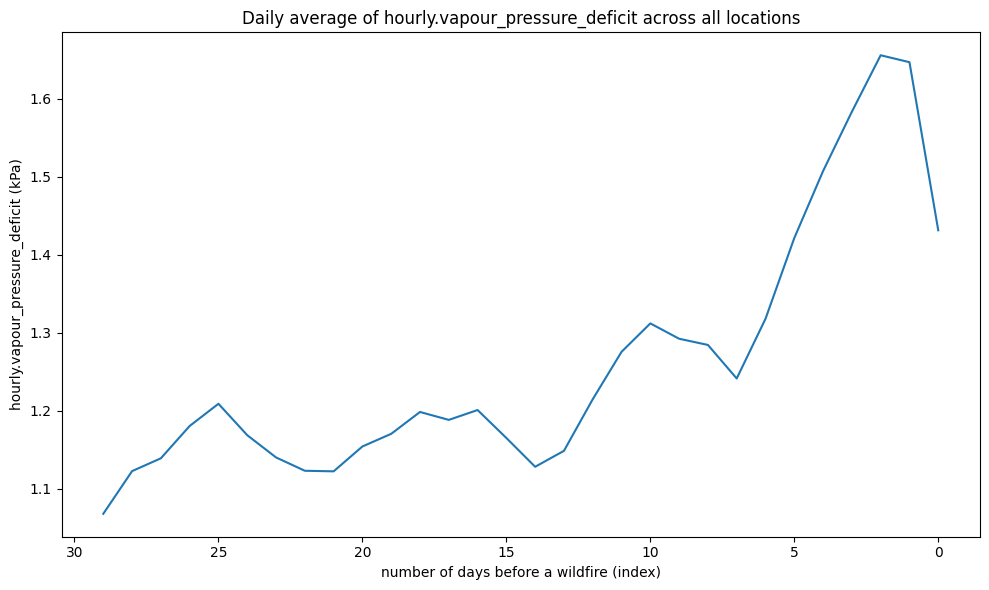

[7.794114877589457, 7.820604990583804, 8.246327683615819, 8.696177024482106, 8.97150894538608, 9.261132297551791, 9.295602636534838, 9.638338041431265, 9.682761299435015, 9.47860404896422, 9.450110640301325, 9.292766007532967, 9.239041902071557, 9.677904896421865, 9.77886299435028, 9.804776365348387, 10.08774011299435, 9.995762711864417, 9.823542843691163, 9.90083804143125, 9.782245762711895, 9.699884651600774, 9.711946798493393, 9.548156779661037, 9.694811676082876, 9.629131355932216, 9.45402071563089, 9.694176082862512, 9.606348870056497, 9.781725517890784]


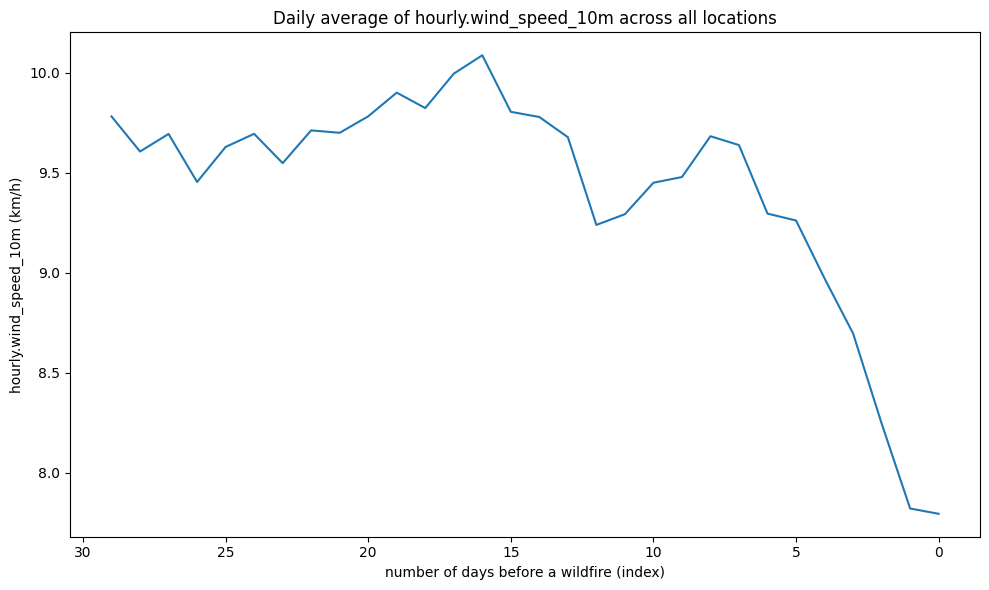

[12.147841337099795, 12.066610169491517, 12.924173728813571, 13.67969161958567, 14.106417137476456, 14.505294256120528, 14.4591596045198, 14.871711393596962, 14.919891713747639, 14.66150894538607, 14.682492937853128, 14.38620998116762, 14.363794726930351, 14.938236817325746, 15.012088041431243, 15.035640301318267, 15.610642655367256, 15.491412429378535, 15.224517419962357, 15.267641242937856, 15.018924199623353, 14.788314500941619, 14.841200564971743, 14.64021892655371, 14.885630885122431, 14.929449152542377, 14.636348870056521, 14.913712335216557, 14.847914312617696, 15.072634180790955]


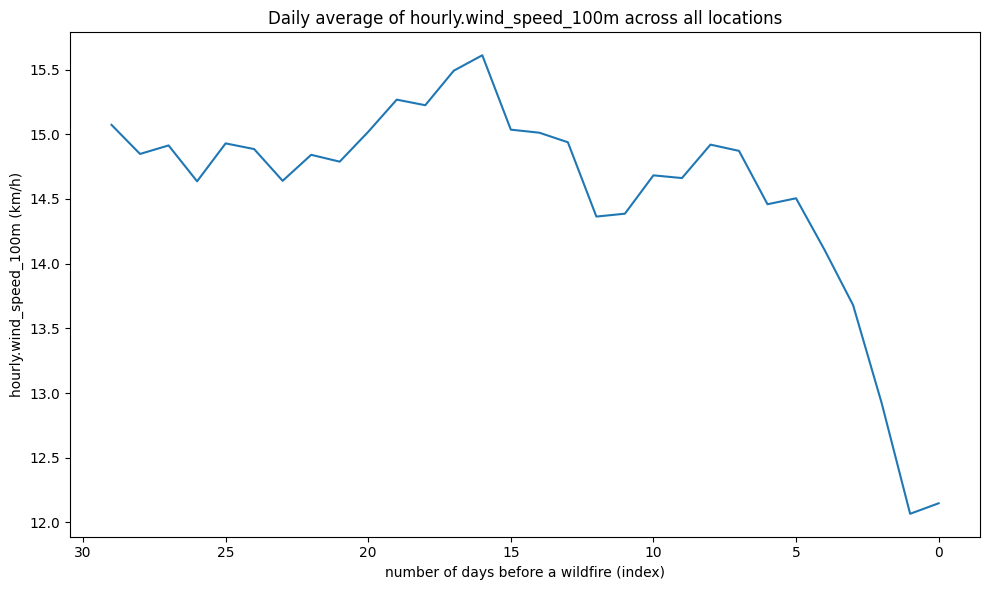

[178.84209039548, 181.53234463276817, 184.11840866289998, 182.51996233521655, 192.0664077212807, 196.40574387947254, 209.69406779661023, 220.0200329566852, 216.88378060263702, 215.8439265536722, 207.33210922787225, 209.24703389830518, 210.58978342749535, 220.38839453860632, 222.742584745762, 221.32274011299424, 214.40882768361533, 212.97387005649736, 212.69896421845598, 218.3296374764595, 227.1004001883239, 227.69060734463284, 231.76546610169424, 225.40430790960446, 224.64682203389813, 215.7754472693033, 215.66869114877582, 215.76494821092268, 214.50313088512246, 218.84470338983016]


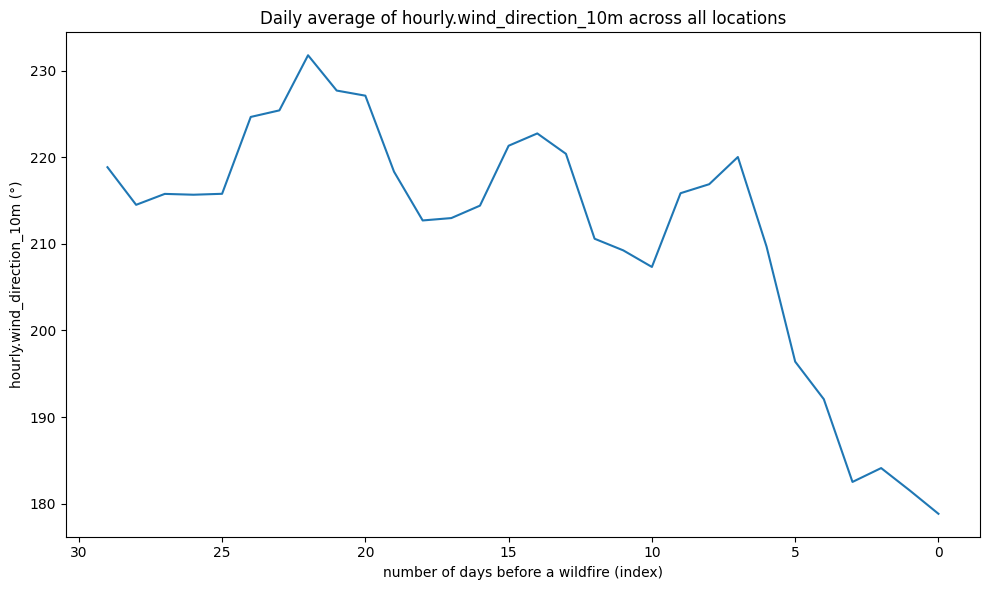

[176.51791431261796, 177.76233521657232, 179.52707156308807, 178.443596986817, 188.49500941619573, 192.63147363465185, 206.11904425611982, 218.69364406779712, 215.19470338983012, 214.0651365348397, 204.50845103578135, 207.20628531073476, 207.7359698681733, 218.27667137476462, 221.98660546139394, 220.43340395480254, 212.25630885122368, 210.78069679849375, 211.99604519774007, 216.32723634651626, 227.12495291902098, 226.7986581920903, 230.63611111111155, 223.9759180790958, 224.33015536723127, 214.230579096045, 213.72735404896417, 215.10593220338976, 213.43943032015068, 218.77097457627124]


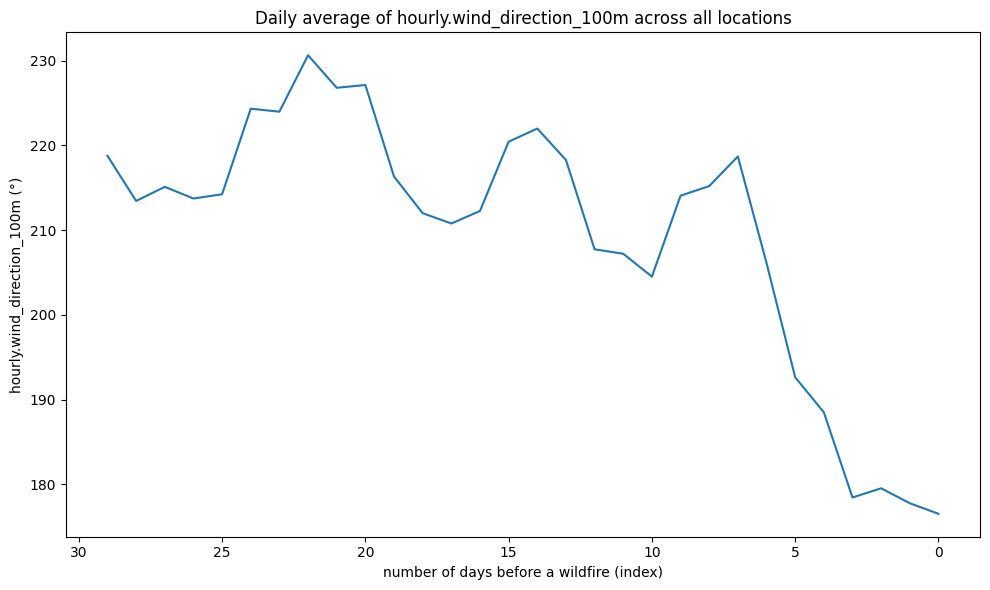

[21.309668079096053, 20.71302730696798, 21.467796610169476, 22.34247410546138, 22.96804143126172, 23.470708568738242, 23.56188794726928, 24.415776836158205, 24.444482109227916, 24.03787664783431, 24.02468220338981, 23.612803672316378, 23.58850282485878, 24.48222693032014, 24.74615819209039, 24.89162664783427, 25.51234934086625, 25.238931261770187, 24.953914783427464, 24.992601224105442, 24.702481167608294, 24.59483286252354, 24.716332391713742, 24.292831920903996, 24.66263418079097, 24.63899482109221, 24.2359769303201, 24.685918079096076, 24.390835687382342, 24.870268361581942]


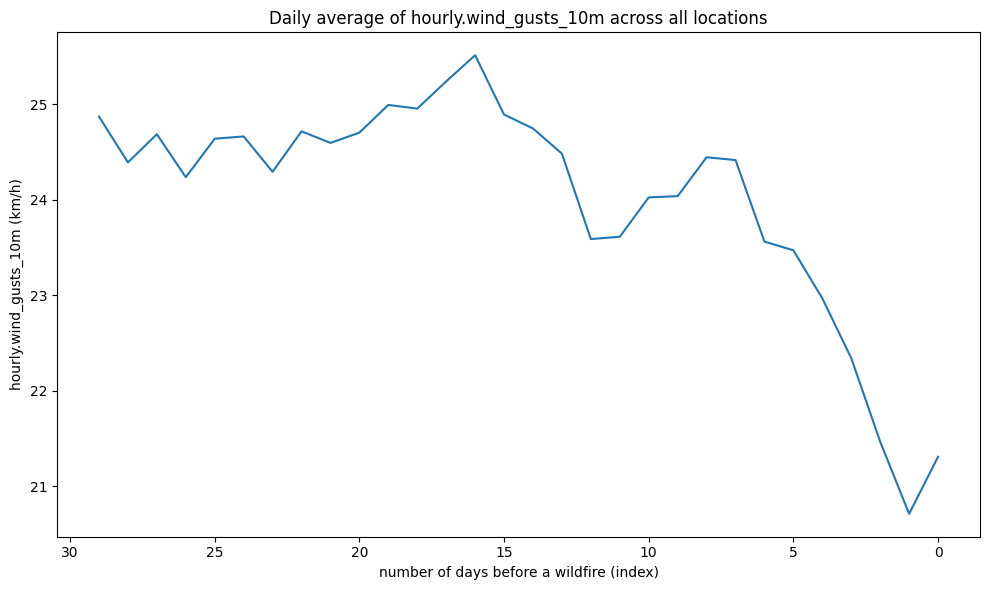

[24.868095574387937, 25.34504237288136, 25.218034369114854, 24.819500941619584, 24.44435028248585, 23.998137947269292, 23.54788135593226, 23.368149717514104, 23.46072033898309, 23.448592278719396, 23.35639359698683, 23.043799435028234, 22.681892655367253, 22.389107815442554, 22.343048493408688, 22.407438794726957, 22.48398775894534, 22.504270244821086, 22.372219868173215, 22.280993408662894, 22.22826506591336, 22.305951035781547, 22.383526365348455, 22.401287664783442, 22.369279661016947, 22.329580979284387, 22.19638418079096, 22.073472222222247, 21.910774482109286, 21.603401600753294]


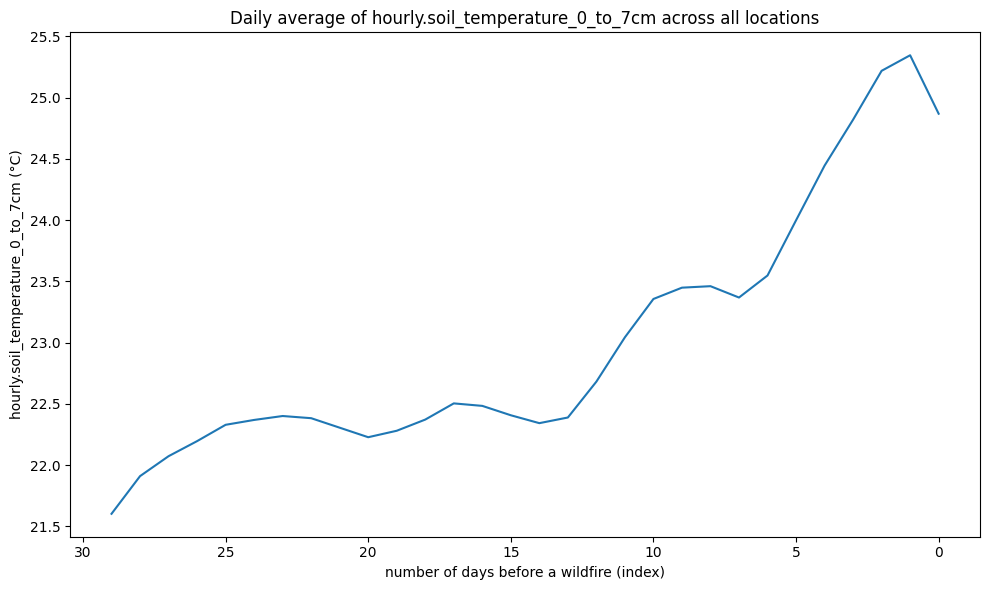

[24.114291431261712, 24.080400188323914, 23.820524952919026, 23.479442090395466, 23.168679378531053, 22.840218926553636, 22.59744114877593, 22.590899246704357, 22.552335216572537, 22.47736346516011, 22.291647834274926, 22.029682203389818, 21.792683615819215, 21.66657250470814, 21.68832627118646, 21.716643126177058, 21.74544962335216, 21.67038606403018, 21.58457862523537, 21.52967749529188, 21.495395480226012, 21.526793785310737, 21.553067325800303, 21.525190677966112, 21.470788606403023, 21.381501883239178, 21.249609227871936, 21.129129001883193, 20.942323446327713, 20.769091337099773]


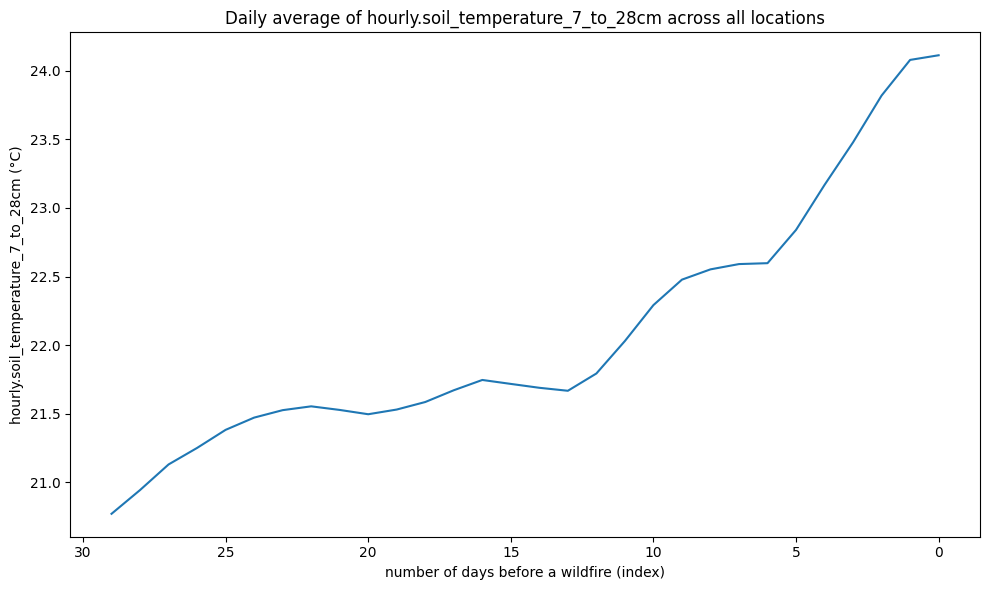

[21.161089924670442, 21.005941619585645, 20.84726930320147, 20.702120998116747, 20.57470338983052, 20.464743408662933, 20.377321092278727, 20.294733992467012, 20.2014077212806, 20.104564500941642, 20.00737994350281, 19.925388418079066, 19.862674199623363, 19.817869585687365, 19.77614171374771, 19.72481167608289, 19.665117702448192, 19.601031073446347, 19.543215630885108, 19.489409133709984, 19.436525423728817, 19.378693502824834, 19.30895951035784, 19.22670433145007, 19.13676318267419, 19.041570150659123, 18.94652777777779, 18.853724105461392, 18.76611346516006, 18.69252118644067]


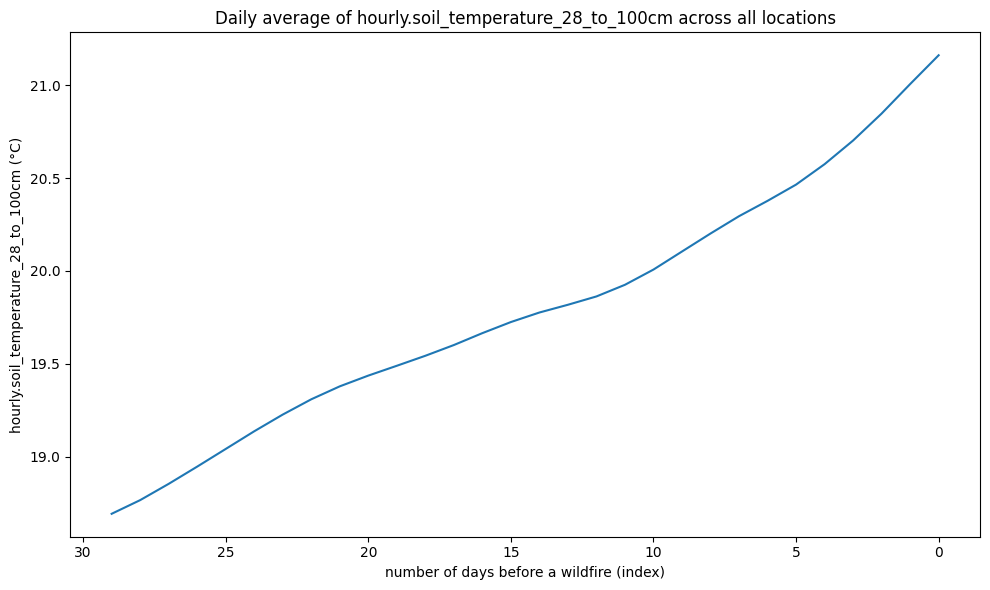

[17.003644067796618, 16.92726224105458, 16.851831450094135, 16.778142655367194, 16.705291902071565, 16.6337829566855, 16.562902542372854, 16.4918620527307, 16.420936911487786, 16.350821563088516, 16.28158898305086, 16.21129472693033, 16.141494821092273, 16.071965630885135, 16.001664312617706, 15.931527777777772, 15.86078389830509, 15.789981167608264, 15.718161487758941, 15.647137476459497, 15.574395009416195, 15.501118173258002, 15.427834274952907, 15.35518832391716, 15.282368173258027, 15.210925141242933, 15.13861111111113, 15.066746704331422, 14.995962806026348, 14.924764595103612]


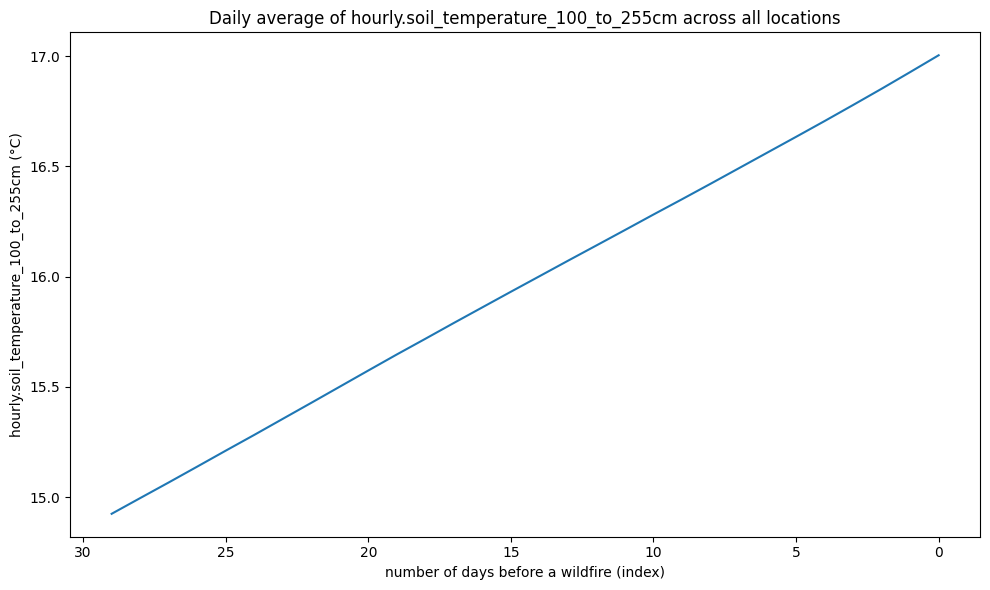

[0.1462652071563086, 0.13586344161958533, 0.13409027777777785, 0.1358625470809795, 0.13837977871939733, 0.14136763182674209, 0.14397008003766482, 0.14574296139359744, 0.14616490112994332, 0.1486859227871938, 0.15090327212805996, 0.15266734934086595, 0.1548971045197741, 0.15714595103578166, 0.15843535781544255, 0.16011805555555525, 0.16386028719397364, 0.16313578154425648, 0.16260894538606419, 0.1632131591337098, 0.1652084039548021, 0.16867255178907714, 0.16914689265536706, 0.16847431732580032, 0.16875169491525466, 0.16986200564971726, 0.17126953860640337, 0.1734140536723162, 0.17599668079096062, 0.17660729755178886]


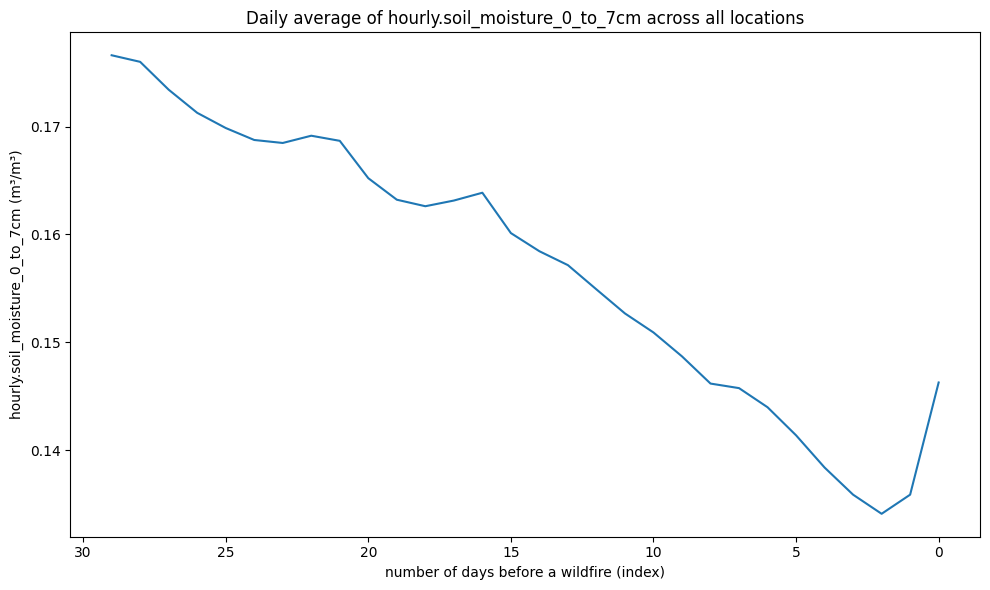

[0.17168434557438778, 0.172525988700565, 0.17393973634651558, 0.1755846986817324, 0.1772057438794726, 0.17853217984934075, 0.17962836629001902, 0.18060447269303204, 0.1815922316384184, 0.1829103578154421, 0.18421904425612048, 0.18552617702448204, 0.18695748587570607, 0.18812339924670407, 0.18892248116760796, 0.1902601694915254, 0.19131862052730703, 0.1916815913371001, 0.19243321563088492, 0.19360941619585695, 0.19491151129943488, 0.19602469397363448, 0.19661565442561227, 0.19711774952919003, 0.19811480696798428, 0.19944613935969885, 0.2008854284369119, 0.2022911252354045, 0.20371993879472636, 0.20497655367231613]


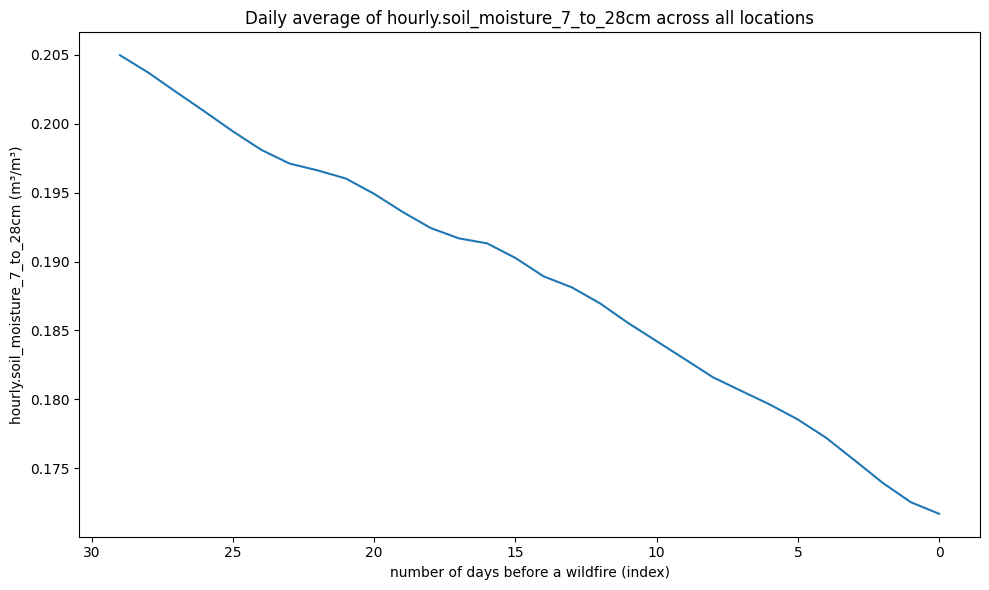

[0.2168254001883241, 0.2176188794726928, 0.21859637476459468, 0.21959402071563058, 0.2205954566854989, 0.2215300612052731, 0.2224587099811675, 0.22339432674199589, 0.22433790018832456, 0.22533199152542407, 0.22631297080979285, 0.2272837806026364, 0.2283168079096045, 0.22927655367231597, 0.23019220809792826, 0.23117226930320087, 0.23211904425611998, 0.2330688794726928, 0.2339728813559321, 0.23495298964218428, 0.23590120056497169, 0.23672961393597025, 0.23751188794726924, 0.23843498116760786, 0.23943156779661023, 0.24048112052730655, 0.24147697740113036, 0.24244861111111093, 0.24345376647834296, 0.24430557909604558]


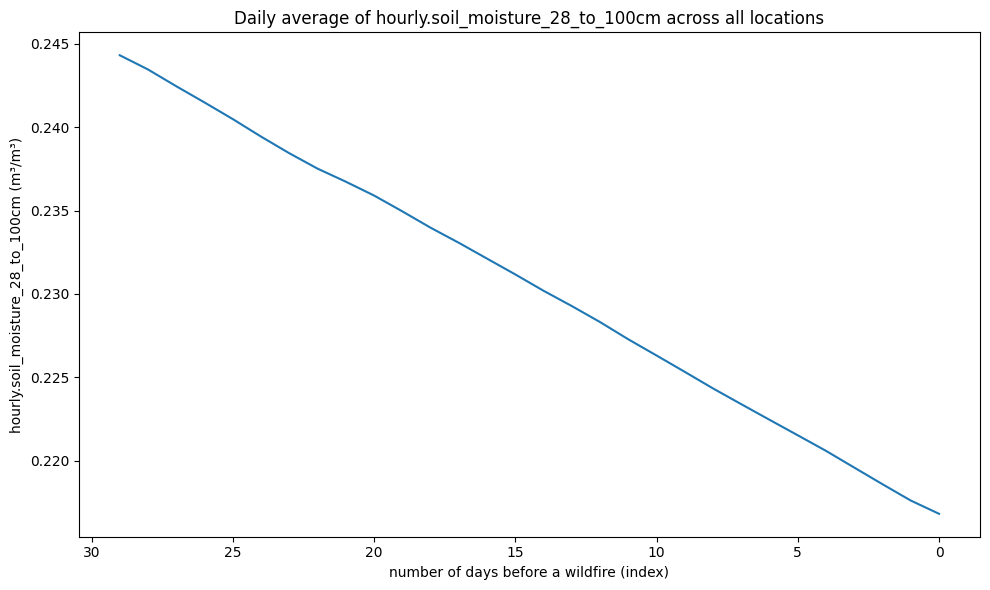

[0.31083804143126154, 0.3112501412429372, 0.31167904896421794, 0.3121104284369114, 0.3125339924670426, 0.3129657721280606, 0.3133835922787195, 0.3137849811676087, 0.3141878295668556, 0.31459272598870075, 0.31500562617702477, 0.31542040960452045, 0.3158129943502828, 0.3161954096045196, 0.31659404425612064, 0.31698604048964235, 0.3173730696798494, 0.3177478342749531, 0.3181295668549898, 0.3185136064030124, 0.31889708097928365, 0.3191954566854986, 0.31949686911487746, 0.3199015065913366, 0.32030983992467027, 0.32070049435028214, 0.3210785546139357, 0.3214703625235404, 0.3218462099811679, 0.3222298493408672]


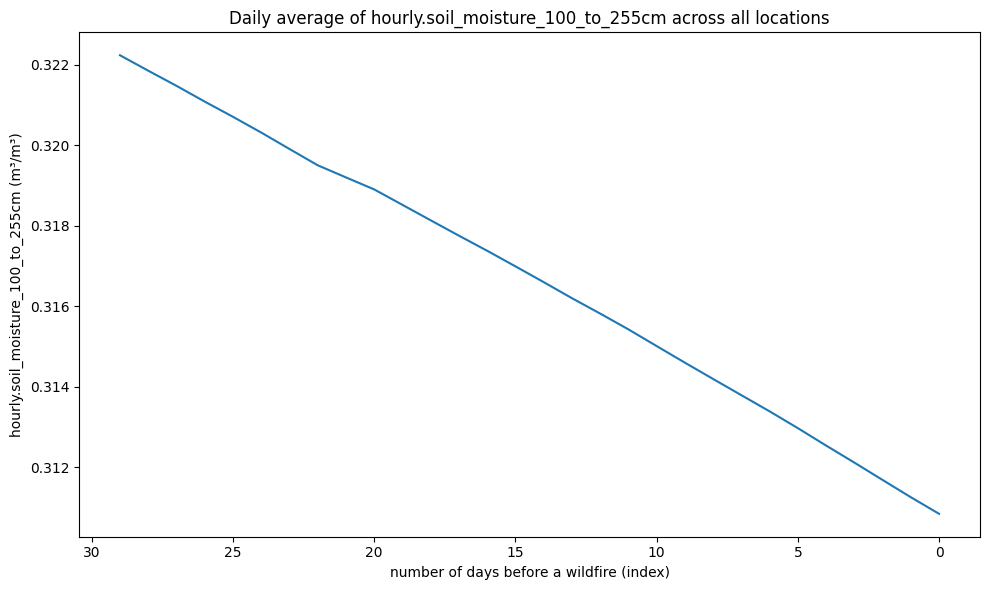

[0.5827919020715683, 0.5837335216572562, 0.5847693032015128, 0.5852401129943563, 0.5861817325800431, 0.586511299435034, 0.5871468926553731, 0.5875706214689327, 0.5883239171374826, 0.5885122410546202, 0.5890772128060325, 0.5898775894538663, 0.5902542372881411, 0.5906779661017002, 0.5909369114877645, 0.5914077212806086, 0.5919256120527371, 0.5920903954802326, 0.5922316384180858, 0.592631826742003, 0.5926789077212873, 0.5927730696798561, 0.5929378531073515, 0.593126177024489, 0.5935969868173326, 0.593903013182681, 0.5936440677966173, 0.593855932203397, 0.5939500941619663, 0.594303201506599]


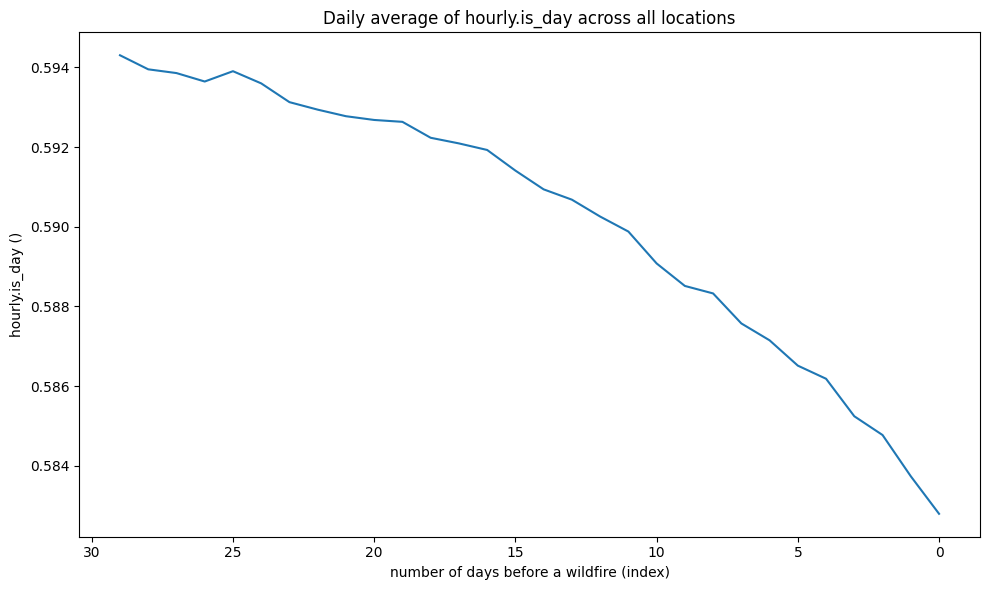

[1743.4978170903942, 1835.3783458097935, 1875.927835687382, 1885.5576996233506, 1891.5649140772189, 1884.6302365819226, 1875.0047424670452, 1820.164819679846, 1867.973997175139, 1860.1430247175135, 1857.4415487288127, 1855.5346654896446, 1861.7686603107331, 1851.957258003769, 1827.3406494821097, 1839.1738260357806, 1810.1311200565021, 1825.6043373352136, 1795.3651473634634, 1813.8402951977423, 1824.3412714218437, 1843.4688177966088, 1841.2112674199648, 1831.6197766007526, 1840.0962017419936, 1832.6802478813556, 1842.7629072504733, 1822.2728020244797, 1823.966403954807, 1823.8023679378534]


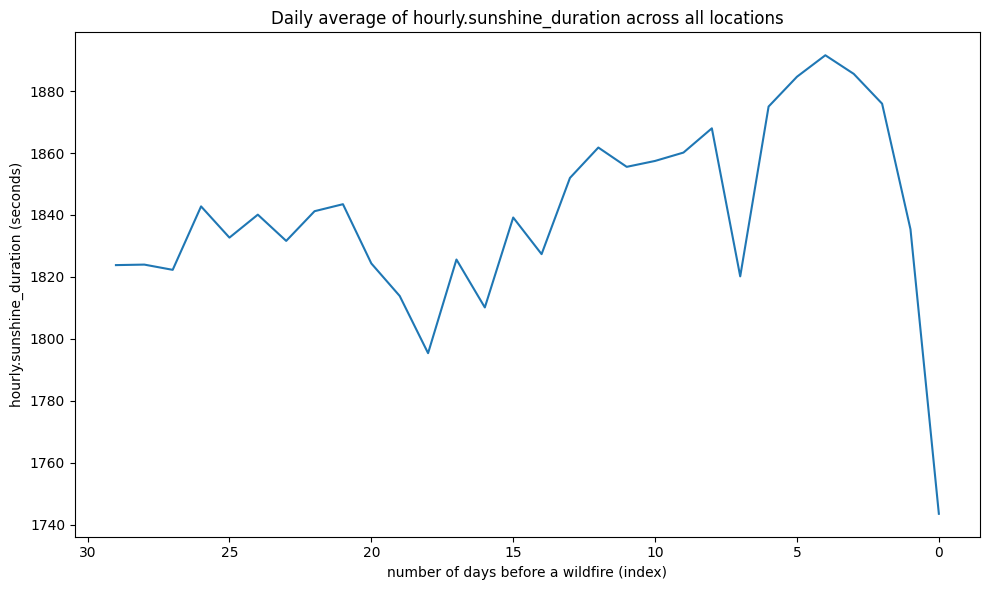

[251.89715160075323, 273.4928436911481, 286.287429378531, 291.24992937853096, 293.7679143126177, 292.4356403013188, 288.34237288135586, 281.9099811676083, 290.32544726930325, 287.0234463276839, 287.13159133709974, 286.53775894538666, 287.839406779661, 288.208992467043, 283.564548022599, 287.05510828625233, 283.59540960451994, 285.512193973635, 281.2747645951037, 282.72582391713735, 285.0290725047079, 287.4868408662905, 281.6714689265537, 283.54475047080933, 284.8397128060266, 284.52123352165756, 287.7173022598874, 286.6974340866288, 285.6697033898302, 284.64260828625214]


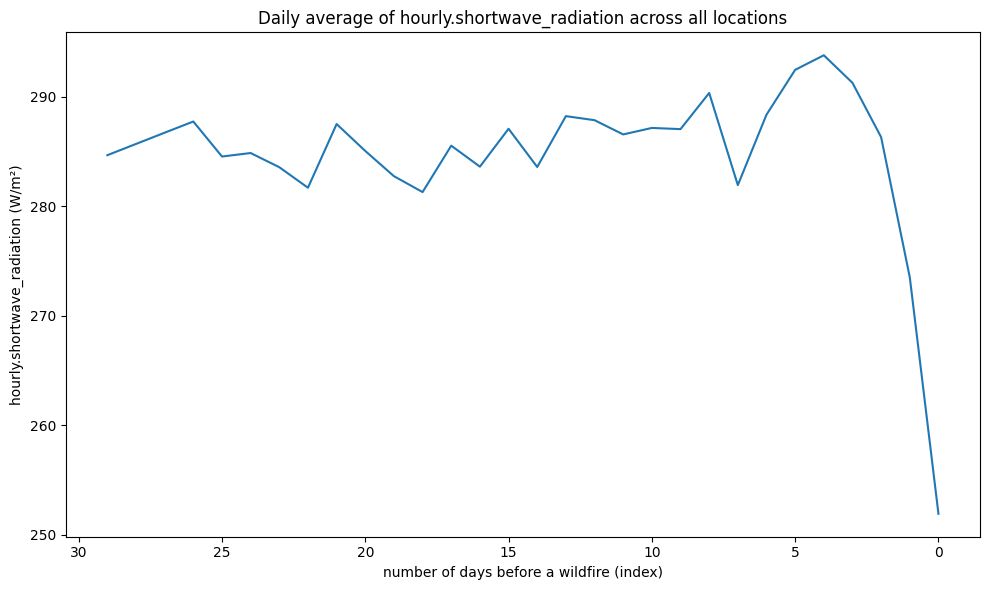

[179.734157250471, 208.0592514124293, 226.3104048964217, 232.4753060263654, 234.9383474576267, 233.13069679849318, 226.16421845574376, 218.05475517890855, 228.4954331450096, 222.7316384180791, 223.1948917137476, 221.29531544256122, 223.80190677966138, 223.3797080979288, 216.90527306967988, 220.55423728813588, 215.67634180790955, 218.7389124293784, 212.85426082862546, 214.44832862523492, 216.41730225988704, 219.28474576271196, 210.8681261770247, 214.2473634651601, 214.81096986817312, 212.2874293785309, 217.27733050847476, 215.60150659133708, 215.5280838041432, 214.46000470809832]


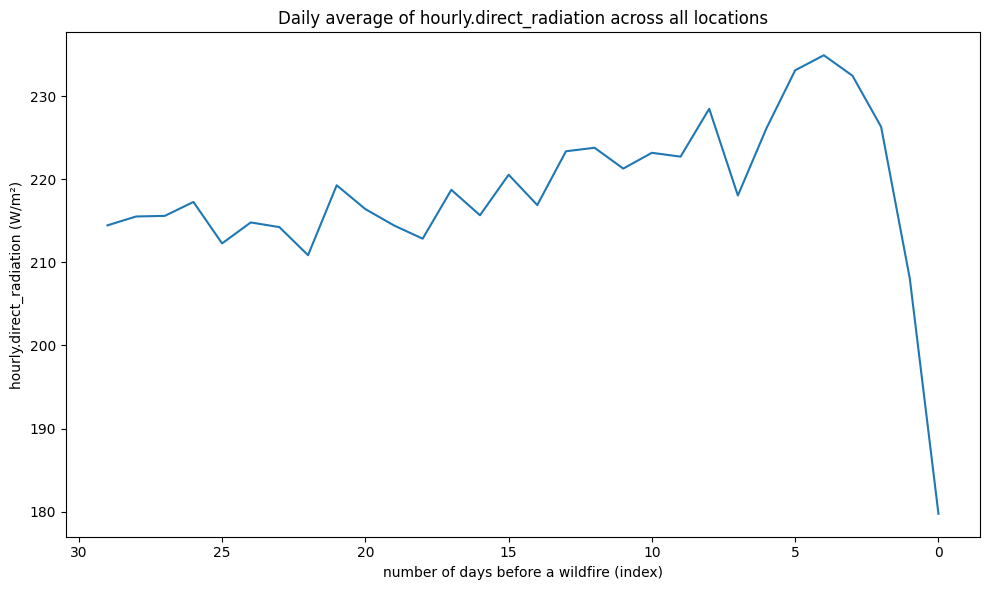

[72.16299435028243, 65.4335922787193, 59.97702448210936, 58.77462335216572, 58.82956685499053, 59.30494350282487, 62.17815442561189, 63.85522598870054, 61.830014124293676, 64.29180790960446, 63.93669962335213, 65.24244350282484, 64.03749999999998, 64.8292843691148, 66.65927495291908, 66.50087099811662, 67.91906779661011, 66.77328154425618, 68.42050376647843, 68.27749529190208, 68.61177024482097, 68.20209510357819, 70.80334274952922, 69.29738700564975, 70.02874293785322, 72.23380414312619, 70.43997175141229, 71.09592749529195, 70.14161958568741, 70.18260357815426]


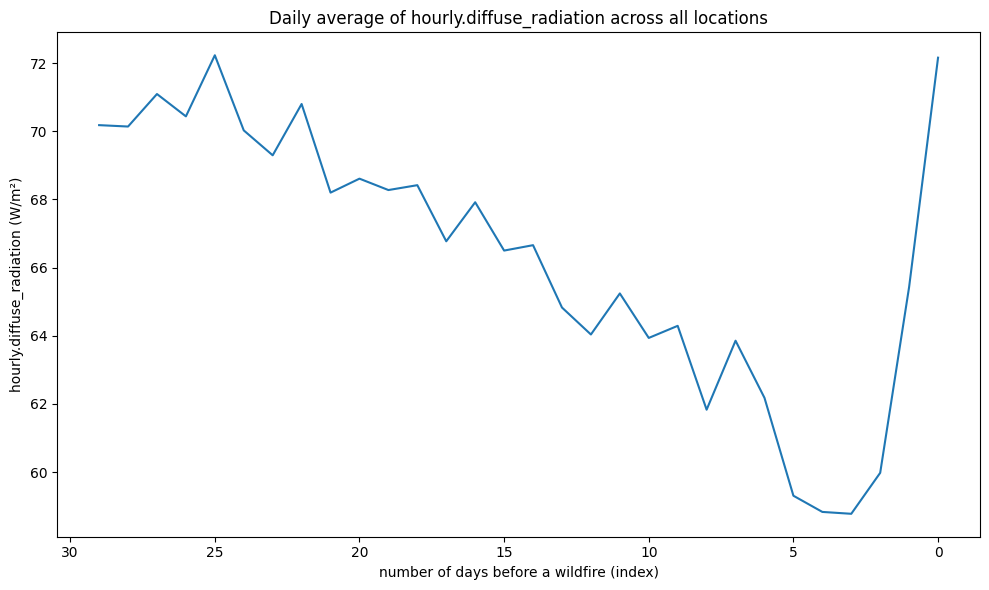

[272.53732109227826, 317.5417467043312, 347.64058380414275, 356.66944444444425, 359.65880649717485, 357.689312617702, 346.3034839924665, 332.32476930320195, 347.87815442561157, 339.601942090395, 341.27778954802216, 338.56802024482084, 341.2575141242941, 339.46588983050873, 329.7144350282491, 333.2045974576274, 326.8566666666662, 331.491195856874, 322.1782721280599, 324.8886346516007, 327.60338041431214, 331.8063794726933, 319.477412900189, 323.84679849340847, 324.8675117702444, 320.30778248587484, 327.38246939736405, 323.2563794726933, 324.4411793785306, 321.54930084745746]


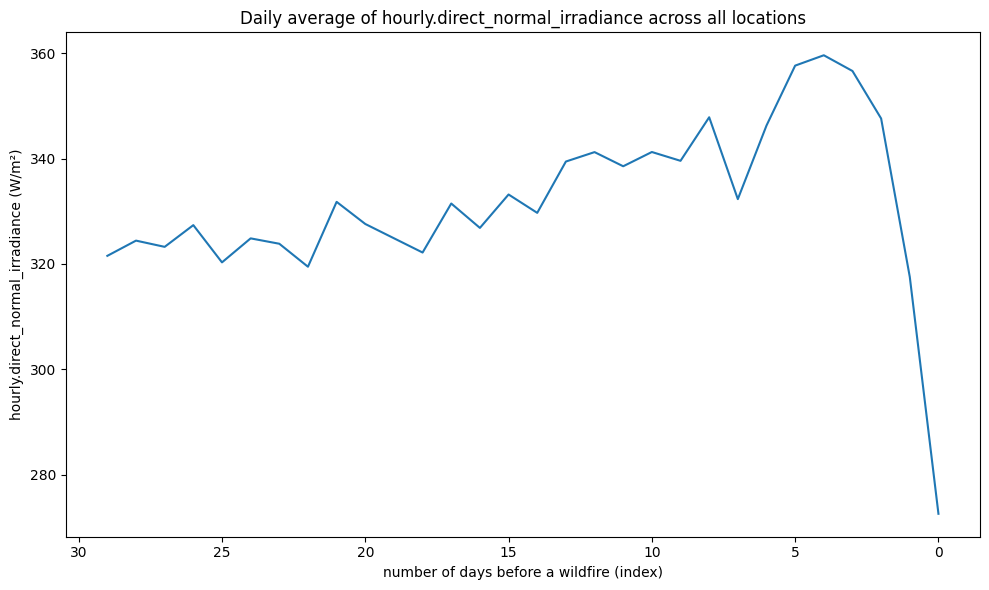

[251.89715160075323, 273.4928436911481, 286.287429378531, 291.24992937853096, 293.7679143126177, 292.4356403013188, 288.34237288135586, 281.9099811676083, 290.32544726930325, 287.0234463276839, 287.13159133709974, 286.53775894538666, 287.839406779661, 288.208992467043, 283.564548022599, 287.05510828625233, 283.59540960451994, 285.512193973635, 281.2747645951037, 282.72582391713735, 285.0290725047079, 287.4868408662905, 281.6714689265537, 283.54475047080933, 284.8397128060266, 284.52123352165756, 287.7173022598874, 286.6974340866288, 285.6697033898302, 284.64260828625214]


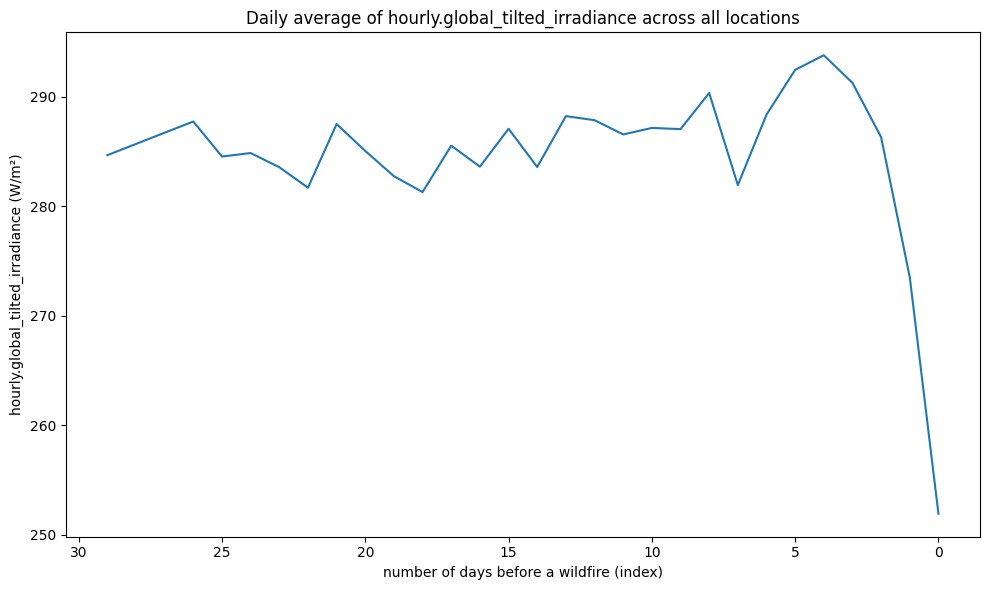

[429.6548540489642, 431.1347128060256, 432.3751388888892, 433.5881261770231, 434.7736228813556, 435.93079802259825, 437.0585169491519, 438.1681792966506, 439.2245645009412, 440.2616831450095, 441.2671209981167, 442.2409486817322, 443.1822575329566, 444.09165725047006, 444.96837099811734, 445.8116902071563, 446.6212217514118, 447.39628766478285, 448.1371445386067, 448.84232344632676, 449.5135522598866, 450.15046610169435, 450.75277306968087, 451.3208474576273, 451.85356873822974, 452.3518549905836, 452.8147528248586, 453.2417914312622, 453.6332203389827, 453.9893361581924]


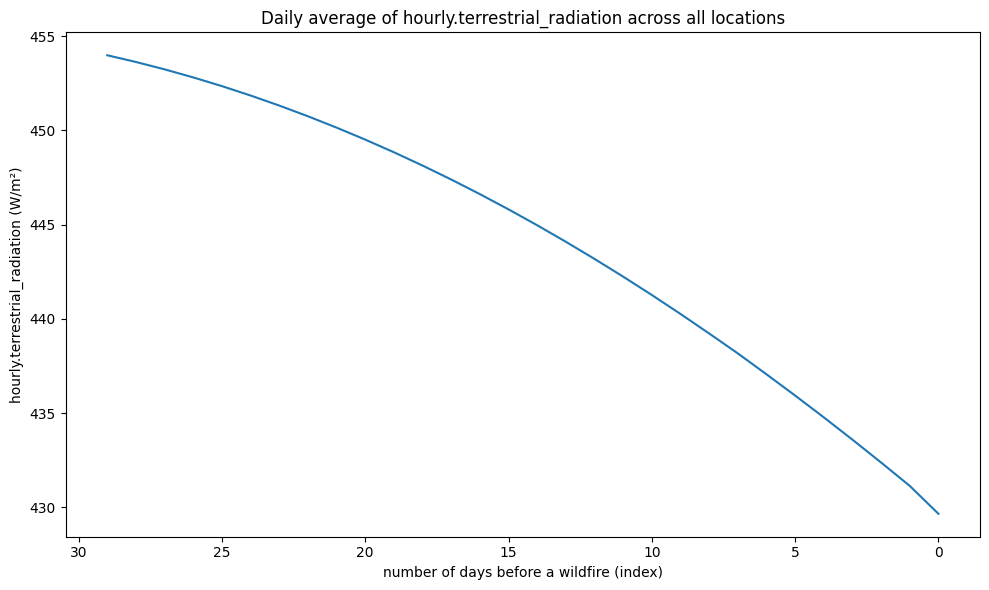

[253.04194915254214, 274.14960922787145, 286.1743173258002, 290.74650188323926, 292.8833121468925, 291.65277777777794, 287.30032956685477, 280.6816078154423, 289.4224811676087, 286.13641713747637, 286.4228931261775, 285.7756803201509, 286.9057203389829, 287.2926647834271, 282.62281073446275, 286.0768385122413, 282.5716078154426, 284.27743644067806, 280.12642419962344, 281.89822033898287, 283.916064030132, 286.2159227871944, 280.67256355932165, 282.7844844632772, 283.7214194915257, 283.5134792843687, 286.85525894538665, 285.554345574388, 284.67990112994374, 283.40619114877563]


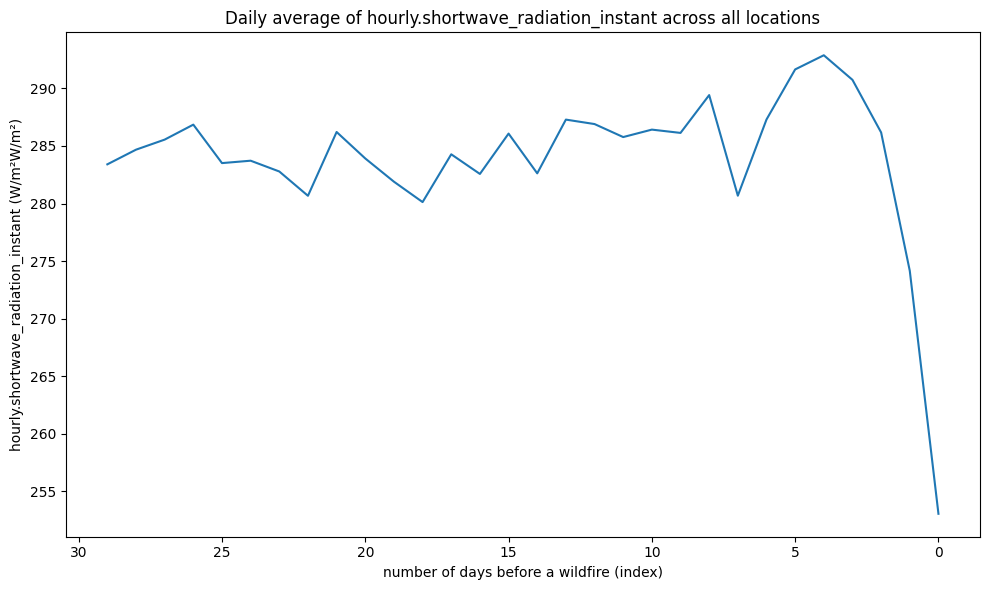

[181.3257179849342, 209.20604519774076, 226.5295338983051, 232.1743173258001, 234.1213841807908, 232.45228107344627, 225.18036016949156, 216.9015018832391, 227.68193502824846, 221.9729519774012, 222.6768549905832, 220.6914147834276, 222.96738465160055, 222.6014359698681, 216.06265536723163, 219.6496327683615, 214.8081191148778, 217.59922080979294, 211.85715395480264, 213.75646186440633, 215.40202448210954, 218.0803813559314, 209.9205790960453, 213.65556732580032, 213.8465795668552, 211.4090630885124, 216.6296257062146, 214.5733945386063, 214.75802495291916, 213.45832391713725]


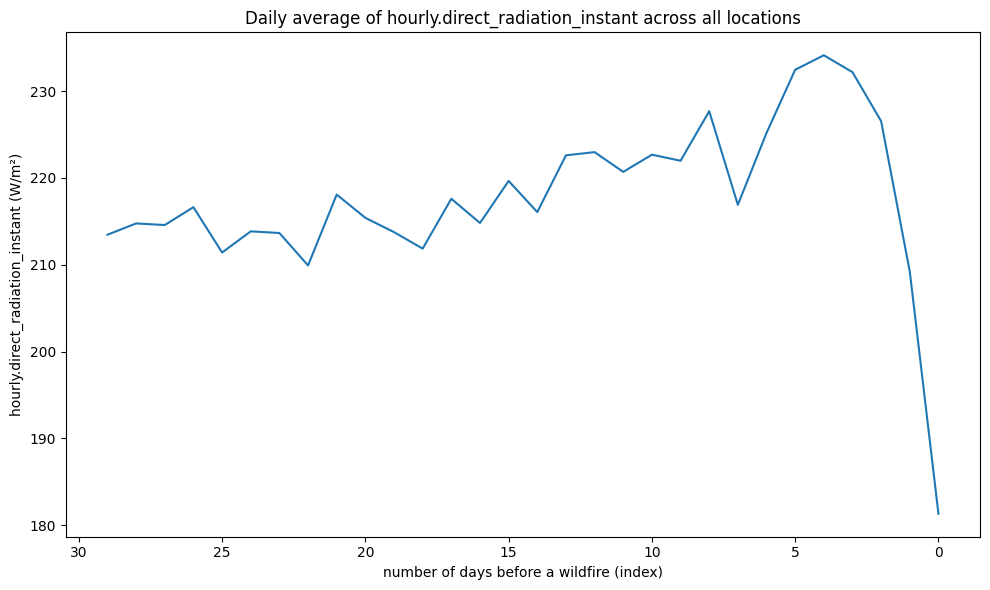

[71.71566854990587, 64.94363229755179, 59.64439736346516, 58.572424670433065, 58.76189265536709, 59.20007532956687, 62.11943502824869, 63.78015536723168, 61.7406920903955, 64.16304378531079, 63.74628295668538, 65.08388182674197, 63.938154425611984, 64.69126412429388, 66.56030602636534, 66.42730696798489, 67.76359934086629, 66.67828625235407, 68.26920668549906, 68.14204096045201, 68.51421139359687, 68.135451977401, 70.75204566854994, 69.12858992467058, 69.87460451977407, 72.1043220338984, 70.22583804143127, 70.98117467043309, 69.92171845574383, 69.94786487758941]


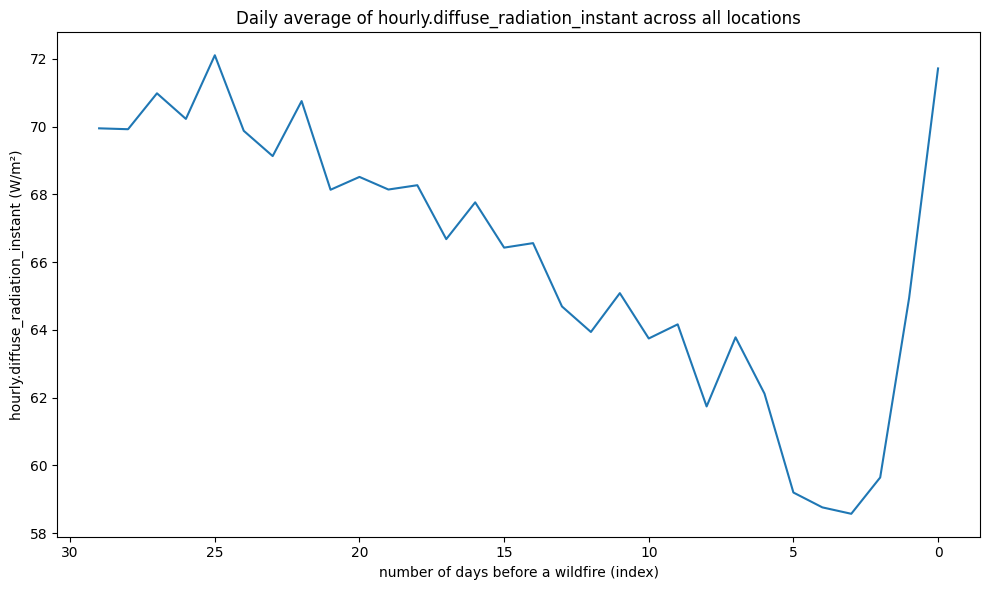

[271.04305555555595, 315.76465160075304, 344.86553672316404, 353.5994632768361, 356.2951153483992, 354.4013064971748, 342.90700329566766, 329.1397292843693, 344.98005414312644, 336.63448681732586, 338.49125470809804, 335.7897951977401, 338.51983521657303, 336.69255649717576, 326.9894609227872, 330.5987664783425, 324.2417161016952, 328.99953860640295, 319.7424764595098, 322.4962664783419, 325.164136064029, 329.2458615819207, 317.01244821092286, 321.55077212806054, 322.5400729755183, 317.9430414312618, 325.1100682674203, 320.87804613935936, 322.1136087570619, 319.058519303202]


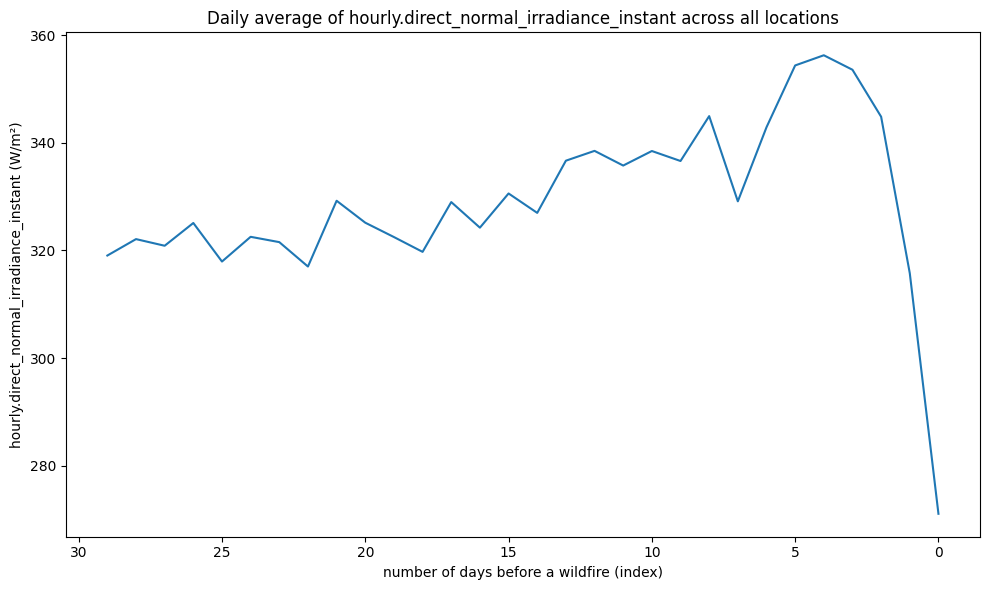

[252.09503060263663, 273.12079802259876, 285.1267255178907, 289.6984486817328, 291.86859227871963, 290.63307909604544, 286.3128460451973, 279.74240819209024, 288.45328625235464, 285.1783074387949, 285.4685145951031, 284.83300847457554, 285.97156308851277, 286.3837217514127, 281.75157015065946, 285.2031661958567, 281.71548493408653, 283.42035310734525, 279.27741290018844, 281.0528036723168, 283.0863088512244, 285.39516242937816, 279.8630108286256, 281.9716078154427, 282.9232226930322, 282.70908192090394, 286.05898540489625, 284.7786793785313, 283.88886064030146, 282.6372363465155]


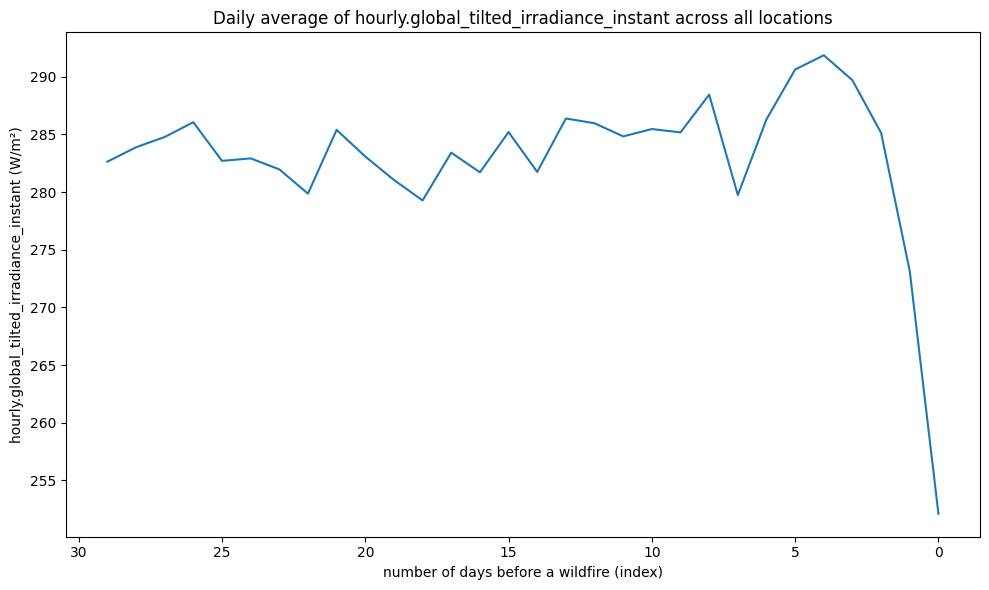

[428.6662335216575, 430.1371539548025, 431.38058851224105, 432.5979849340859, 433.7876906779676, 434.94804378531205, 436.0797693032009, 437.18278719397443, 438.25482815442524, 439.2954566854985, 440.3056520715624, 441.28401836158247, 442.22889830508507, 443.1401177024474, 444.01783662900175, 444.8621539548022, 445.6724246704333, 446.4484439736342, 447.18897598870115, 447.89543549905807, 448.56883474576347, 449.2073375706207, 449.81063088512303, 450.3788135593219, 450.9119985875712, 451.4100376647837, 451.8719562146894, 452.2981144067787, 452.689286723163, 453.04564265536675]


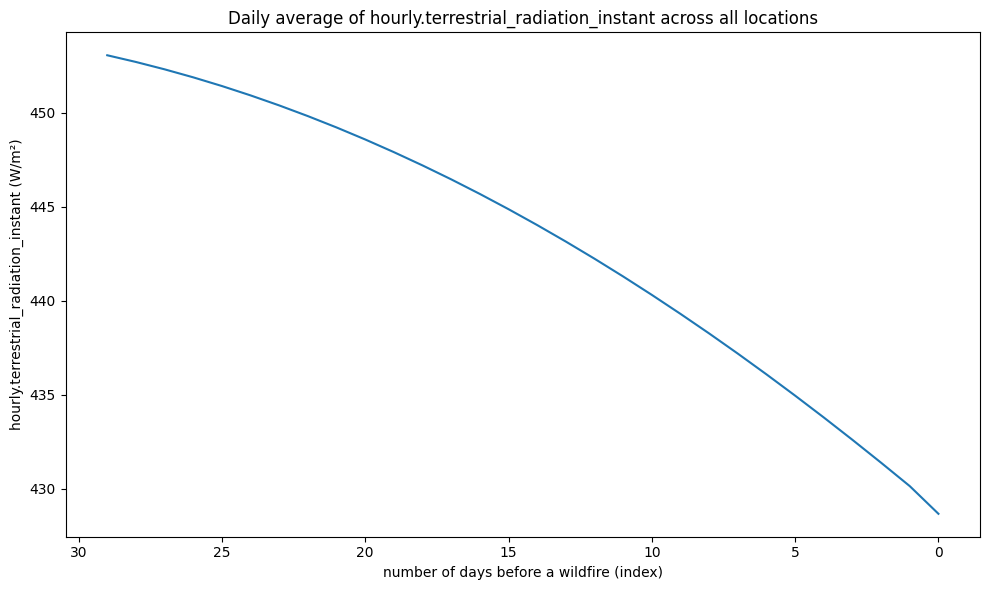

[18.87225118299947, 23.737666119852374, 25.228360400055823, 25.369277566496244, 24.950324142595168, 24.169599226364923, 22.769859297801524, 22.181466247766075, 22.714325827840774, 22.379758677904835, 22.170688185567627, 21.59980982171218, 20.884656854345785, 20.53301792738283, 20.264904899937548, 20.833093577848416, 20.77347572926686, 20.43065366916089, 20.588890519899746, 20.535983934105786, 20.22174697206602, 19.157587464605204, 18.941201501995963, 19.036716009178075, 19.504832616793024, 20.052114188479997, 19.70402731895807, 19.446757964293997, 18.78246140324386, 17.862604475717625]


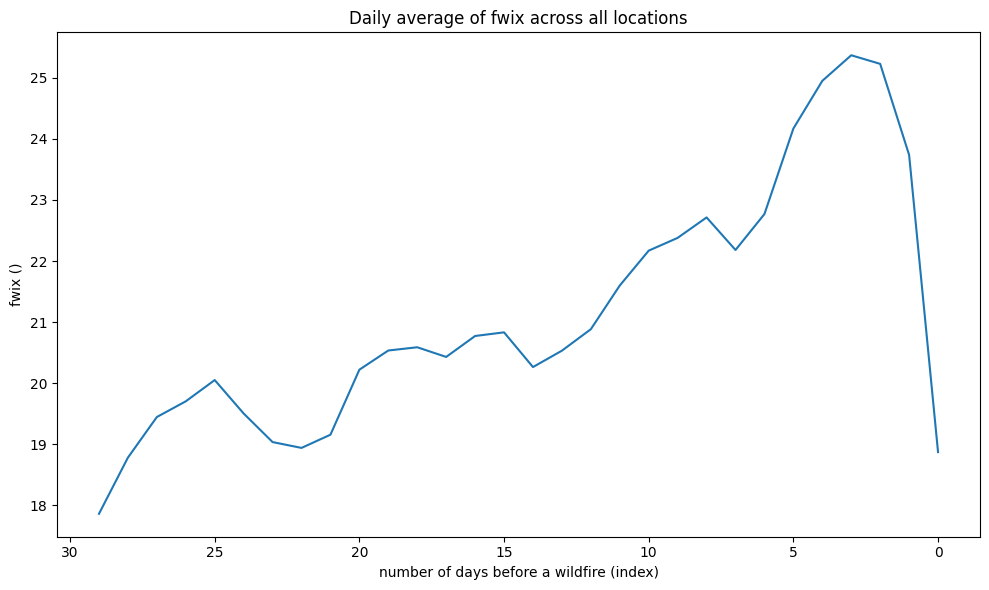

[78.43865513159643, 84.41759304355116, 85.84624883112548, 85.90635066701357, 85.4311238652387, 84.4035079130041, 82.90391829577264, 82.34887564330121, 83.03128159169195, 82.54455054188989, 82.22226652417794, 82.01485162444085, 81.70295498688255, 81.13659058507605, 81.12593420882155, 80.78753376163897, 79.52877277894873, 79.39221360860212, 79.93194226527093, 80.67815206249216, 80.74930575303473, 79.28874761697517, 78.9504679042738, 79.38894527763364, 79.73670655496853, 80.42718492125888, 80.35771131582649, 79.9478219861383, 79.00066279239098, 78.81520535958714]


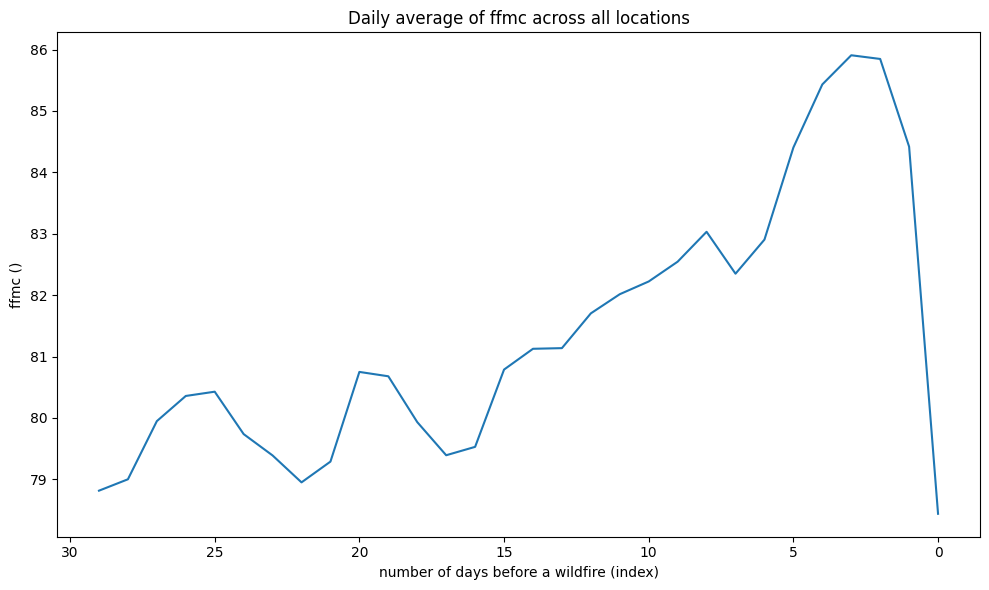

[138.74621894993837, 162.49381018921983, 166.88794831808343, 165.90428336905376, 161.4601667520845, 156.16678867404428, 150.29789681165178, 149.00029287329383, 149.12234320970202, 146.90946421996694, 144.3114811739446, 141.23009935689487, 138.54353308836588, 135.37329266056307, 133.79175021217168, 132.45932775354817, 130.47466549380206, 129.3659741844063, 130.93970397710777, 131.39929708906254, 129.26982029972524, 125.65162045101349, 125.73062774287781, 125.14560734141799, 124.74221632918866, 125.5597482172183, 123.47230541938993, 120.9620116171953, 116.62436686304862, 114.10995372418977]


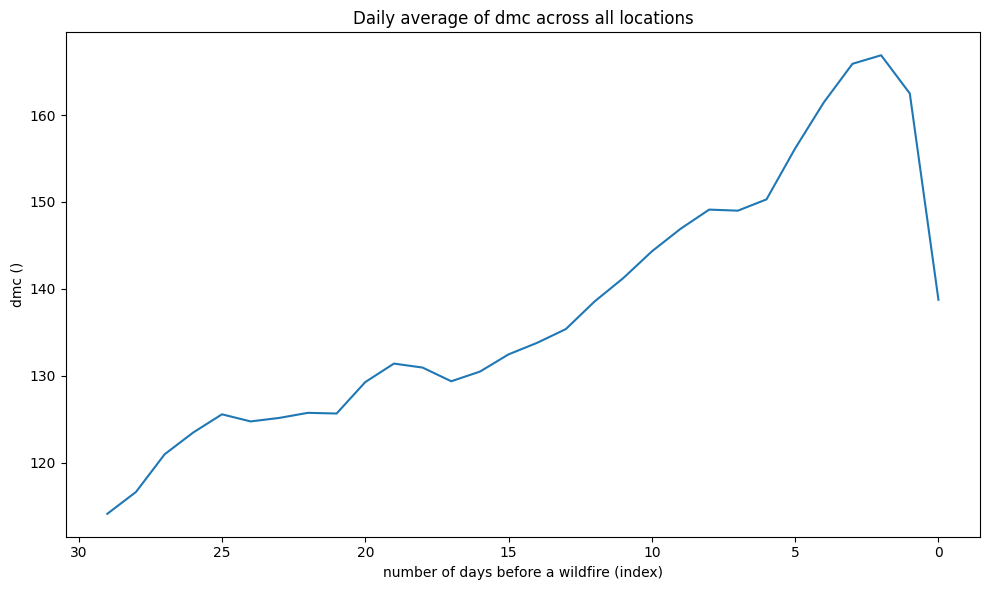

[622.0401190028266, 637.4619485770802, 635.1395228108619, 626.9022392602808, 617.0320125589657, 607.8883583668108, 598.1704404589085, 592.2441025068274, 588.5074895577776, 580.4149134717377, 572.7168780152282, 566.7901770586498, 558.2849200180841, 550.9509238958086, 548.9314153841897, 536.5393597296728, 525.8484842254545, 525.5543345816245, 526.7955331046423, 523.9790586537626, 514.0783680944324, 503.3751641994108, 501.55498304853074, 497.03236907554026, 493.85263605841766, 490.78856022878324, 485.24700484832067, 478.73176622776555, 469.2203265602809, 462.80207483904377]


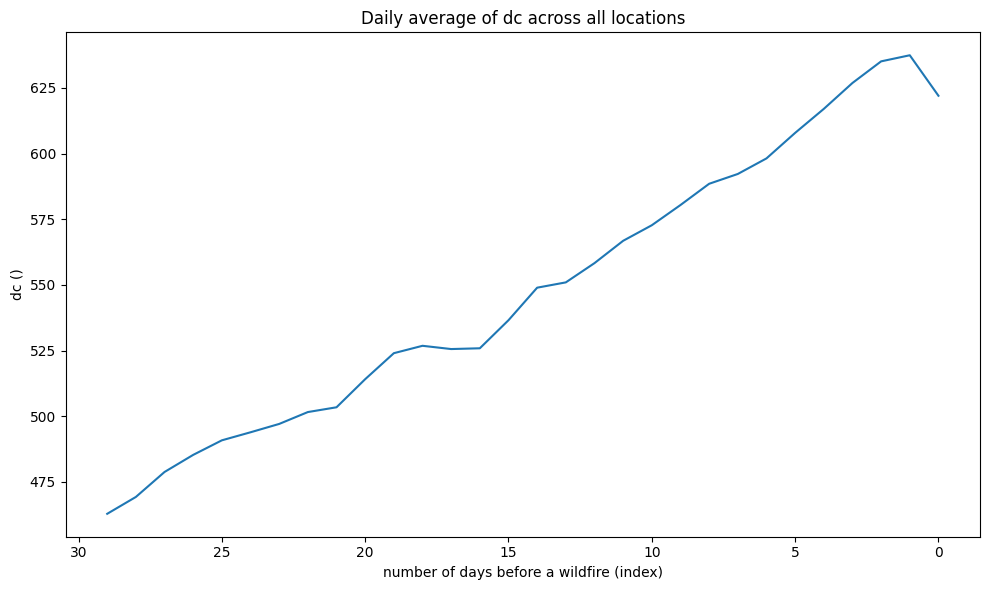

[4.7210022285968485, 6.033233845192069, 6.492679351535625, 6.5630412254106405, 6.475323758440978, 6.267939182639945, 5.862784534500238, 5.701837386420719, 5.895308369613671, 5.810760050806114, 5.7691847162694785, 5.595635147721713, 5.397545265074435, 5.36551410796882, 5.304407340945421, 5.543556292662099, 5.568668845877084, 5.44593294811947, 5.493152425863724, 5.472201502487483, 5.402007057313481, 5.080818135890943, 4.960493188217568, 5.013730258869426, 5.197810475135427, 5.353805916319839, 5.244897104122284, 5.191843586390691, 5.054252688770294, 4.800864470200348]


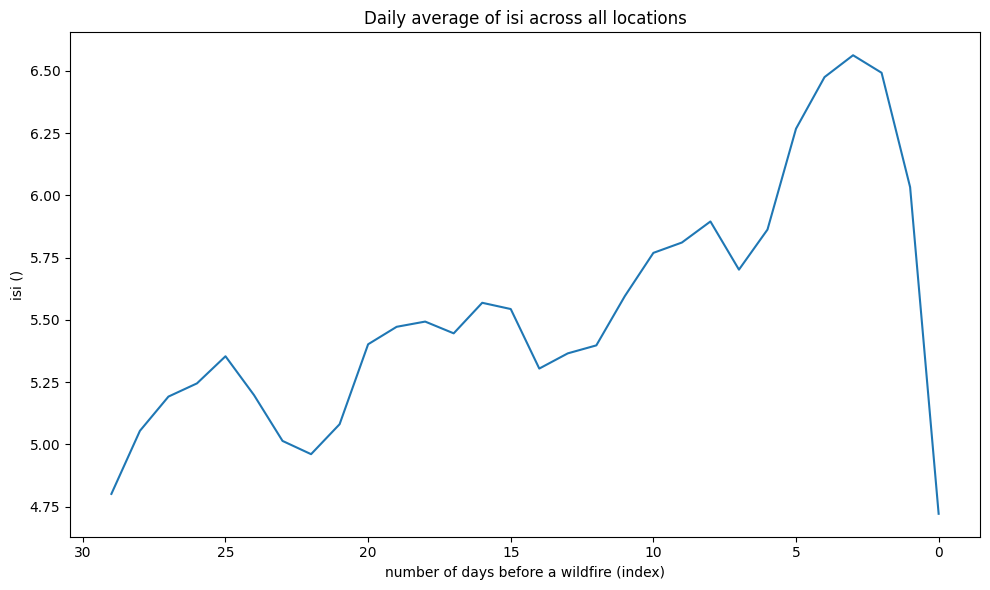

[165.9269294664791, 190.54529208276253, 194.9010903294037, 193.68381455343336, 189.15334115952038, 183.5914253375112, 177.51279931545565, 176.0300358548078, 175.74785852359497, 172.9957653901649, 170.17638624733033, 166.77370845206048, 164.1008271276948, 160.55480148538643, 158.79877572074489, 156.2843088358166, 153.6398802840479, 152.4281528463737, 154.8092440446537, 155.55109950425538, 152.86153848231174, 148.53410110877275, 148.64620783152083, 147.80767660280983, 147.28697099027815, 147.95100910035407, 145.79537842971115, 143.15200248728394, 138.0811033543996, 135.53124096839375]


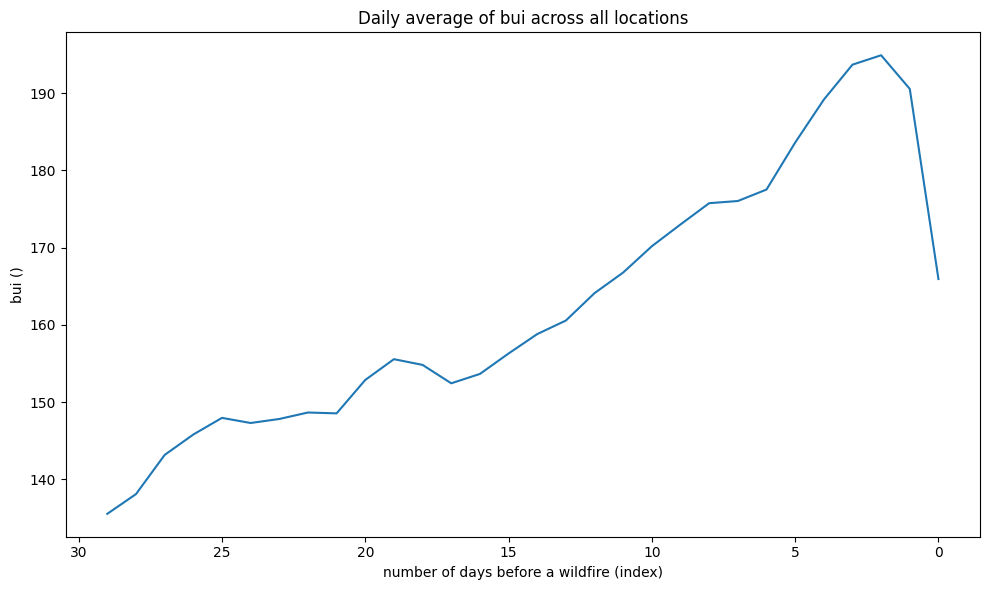

In [50]:
grouped = df.groupby('location')

for j in range(len(vars)):
    sux = 0

    values = []

    for i in range(1, 30+1):
        for name, group in grouped:
            last_entry = group[f'{vars[j]}'].iloc[-i]
            sux += float(last_entry)

        values.append(sux/len(grouped))
        sux = 0

    print(values)

    var = var.replace('hourly.', '')

    plt.figure(figsize=(10, 6))
    plt.plot(values)
    plt.gca().invert_xaxis()
    plt.title(f'Daily average of {vars[j]} across all locations')
    plt.xlabel('number of days before a wildfire (index)')
    plt.ylabel(f'{vars[j]} ({units[j]})')
    plt.tight_layout()
    plt.savefig(f'avg_{var}.png', dpi=300, bbox_inches='tight')
    plt.show()

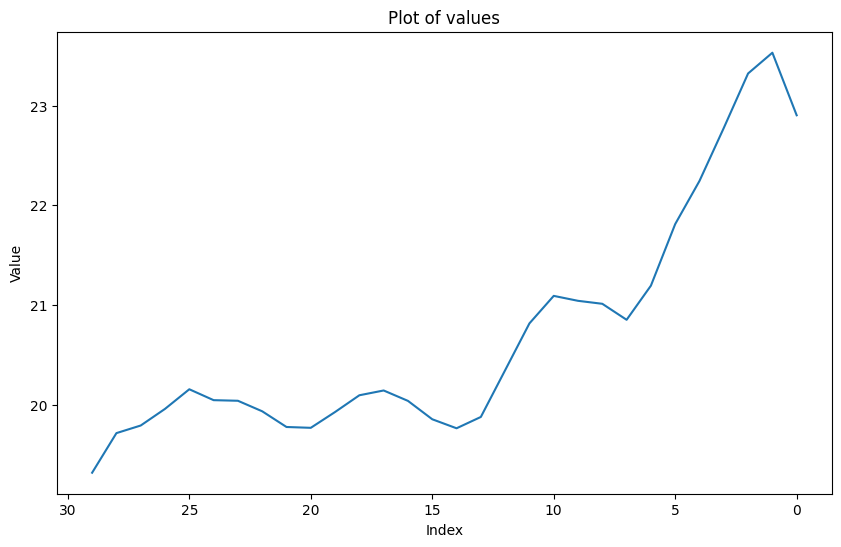

In [39]:
import matplotlib.pyplot as plt

# Assuming 'values' is your list
